In [1]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split, cross_val_score
import lime
import lime.lime_tabular
import numpy as np
colors = ["#9DAFB0", "#75E6DA", '#189AB4', '#05445E', '#4D707E', '#56B66B']
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import IPython
from IPython.display import display, HTML

from IPython.display import Audio, display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE
import scikitplot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')



from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
from pycalib.metrics import brier_score, ECE, MCE, cross_entropy, accuracy
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from pycalib.metrics import brier_score, ECE, MCE, cross_entropy, accuracy
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
import IPython
from IPython.display import display, HTML

def play_sound(url):
    display(HTML(f'<audio src="{url}" autoplay="true"></audio>'))

# 当代码执行结束后播放音效
def play_sound_on_execution_end():
    play_sound("https://www.soundjay.com/misc/bell-ringing-05.mp3")

# 在异常发生时播放音效
def exception_hook(shell, etype, evalue, tb, tb_offset=None):
    play_sound("https://www.soundjay.com/misc/fail-buzzer-03.mp3")
    shell.showtraceback((etype, evalue, tb), tb_offset=tb_offset)

get_ipython().set_custom_exc((Exception,), exception_hook)
get_ipython().events.register('post_execute', play_sound_on_execution_end)


In [3]:
# 读取数据集
data = pd.read_csv('stroke0907.csv', header=None)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30669,Male,3,0,0,No,children,Rural,95.12,18,NaN,0
2,30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43396,56196,Female,10,0,0,No,children,Urban,58.64,20.4,never smoked,0
43397,5450,Female,56,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43398,28375,Female,82,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43399,27973,Male,40,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [5]:
# 设置第一行为列名
data.columns = data.iloc[0]
# 删除现在的第一行
data = data.drop(0)

In [6]:
# 删除包含空值的行
data.dropna(inplace=True)

In [7]:
# 删除名为 "id" 的列
data.drop('id', axis=1, inplace=True)

In [8]:

data.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

# 处理非数值类型的特征
label_encoder = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    data[col] = label_encoder.fit_transform(data[col])


data['age'] = pd.to_numeric(data['age'])
data['hypertension'] = pd.to_numeric(data['hypertension'])
data['heart_disease'] = pd.to_numeric(data['heart_disease'])
data['avg_glucose_level'] = pd.to_numeric(data['avg_glucose_level'])
data['bmi'] = pd.to_numeric(data['bmi'])
data['stroke'] = pd.to_numeric(data['stroke'])

X = data.drop(["stroke"], axis=1)
y = data["stroke"] 

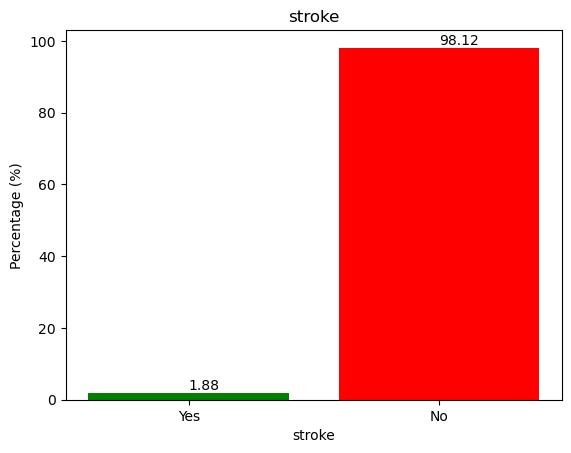

In [9]:
# 计算y中1和0的数量
count_y = y.value_counts()

# 计算1和0占总体的比例
total_y = len(y)
ratio_yes = (count_y[1] / total_y) * 100
ratio_no = (count_y[0] / total_y) * 100

# 数据准备
labels = ['Yes', 'No']
values = [ratio_yes, ratio_no]

# 绘制柱状图
fig, ax = plt.subplots()
bars = plt.bar(labels, values, color=['green', 'red'])

# 在柱子上显示准确的数值
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

# 设置标题和标签
plt.ylabel('Percentage (%)')
plt.xlabel('stroke')
plt.title('stroke')

# 显示图
plt.show()

In [16]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

In [16]:
# 设置QDA模型
qda = QuadraticDiscriminantAnalysis()

# 设置要进行网格搜索的参数。这里仅为示例，具体参数需要你自己设定。
param_grid = {
    'reg_param': np.linspace(0.0, 1.0, 10),  # 正则化参数
    'tol': [1e-3, 1e-4, 1e-5]  # 公差（收敛阈值）
}

# 进行网格搜索
grid_search = GridSearchCV(qda, param_grid, cv=rskf)  # 5折交叉验证

# 在数据上训练网格搜索对象
grid_search.fit(X, y)

# 输出最优参数
print("Best parameters: ", grid_search.best_params_)

# 输出最优模型的评分
print("Best score: ", grid_search.best_score_)

# 输出最优模型
best_model = grid_search.best_estimator_

Best parameters:  {'reg_param': 0.1111111111111111, 'tol': 0.001}
Best score:  0.9734911185313554


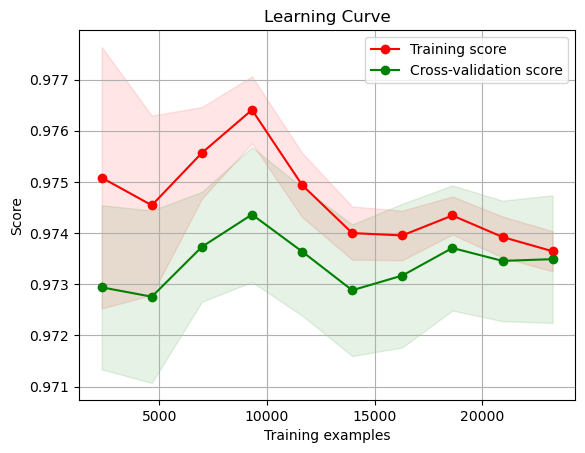

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels

qda = QuadraticDiscriminantAnalysis(reg_param=0.1111111111111111, tol=0.001)

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    qda, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [18]:
lda = LinearDiscriminantAnalysis()

# 设置要进行网格搜索的参数
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  # 求解器
    'shrinkage': [None, 'auto'],  # 收缩参数
    'priors': [[0.5, 0.5]]  # 先验概率
}

# 进行网格搜索
grid_search = GridSearchCV(lda, param_grid, cv=rskf,  n_jobs=-1)  # 确保rskf已定义

# 在数据上训练网格搜索对象
grid_search.fit(X, y)  # 使用标准化后的数据

# 输出最优参数
print("Best parameters: ", grid_search.best_params_)

# 输出最优模型的评分
print("Best score: ", grid_search.best_score_)

# 输出最优模型
best_model = grid_search.best_estimator_

Best parameters:  {'priors': [0.5, 0.5], 'shrinkage': None, 'solver': 'svd'}
Best score:  0.7761536690624218


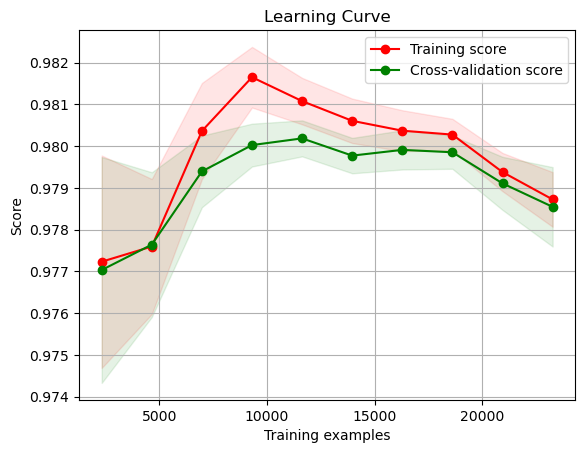

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels

lda = LinearDiscriminantAnalysis(priors=None, shrinkage=None, solver='svd')

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    lda, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [28]:
# 创建逻辑回归模型实例
log_reg = LogisticRegression(max_iter=10000, n_jobs=-1)

# 定义要搜索的参数网格
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(log_reg, param_grid, cv=rskf, n_jobs=-1)  # 使用5折交叉验证

# 在数据上执行网格搜索
grid_search.fit(X, y)

# 输出找到的最优参数
print("Best parameters: ", grid_search.best_params_)

# 输出最优模型在交叉验证中的平均得分
print("Best score: ", grid_search.best_score_)

# 获取并输出最优模型
best_model = grid_search.best_estimator_
print("Best model: ", best_model)

Best parameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score:  0.9811502522597187
Best model:  LogisticRegression(C=0.01, max_iter=10000, n_jobs=-1, solver='newton-cg')


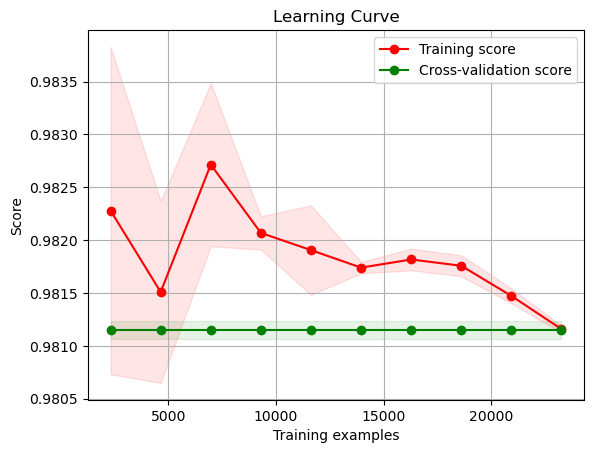

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels

log_reg = LogisticRegression(C=0.001, max_iter=10000, n_jobs=-1, solver='newton-cg')

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [25]:
# 创建决策树模型实例
dt = DecisionTreeClassifier()

# 定义要搜索的参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10]
}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# 创建GridSearchCV对象
grid_search = GridSearchCV(dt, param_grid, cv=rskf, n_jobs=-1)  # 使用5折交叉验证

# 在数据上执行网格搜索
grid_search.fit(X, y)

# 输出找到的最优参数
print("Best parameters: ", grid_search.best_params_)

# 输出最优模型在交叉验证中的平均得分
print("Best score: ", grid_search.best_score_)

# 获取并输出最优模型
best_model = grid_search.best_estimator_
print("Best model: ", best_model)

Best parameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}
Best score:  0.9811502522597187
Best model:  DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5)


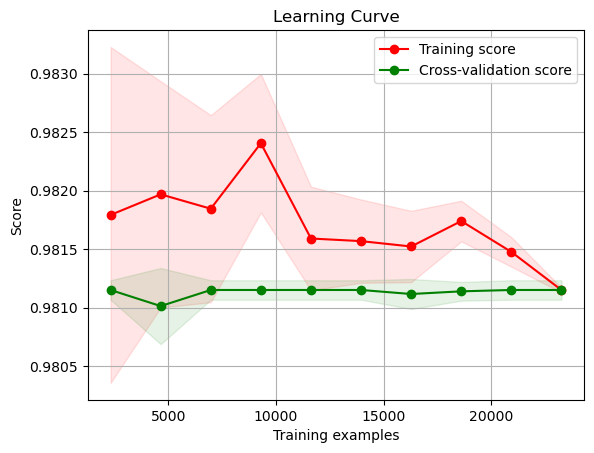

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels

dt = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter='best')

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    dt, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [28]:
# 定义超参数网格
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [4, 5, 6, 8]
}

# 创建随机森林分类器实例
rf = RandomForestClassifier()

# 创建网格搜索实例
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=rskf, n_jobs=-1, verbose=1)

# 进行网格搜索
grid_search.fit(X, y)

# 输出最优参数
print("Best parameters:", grid_search.best_params_)

# 输出最优模型的评分
print("Best score:", grid_search.best_score_)

# 获取并输出最优模型
best_model = grid_search.best_estimator_
print("Best model: ", best_model)

Fitting 15 folds for each of 192 candidates, totalling 2880 fits
Best parameters: {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}
Best score: 0.9811502522597187
Best model:  RandomForestClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=10)


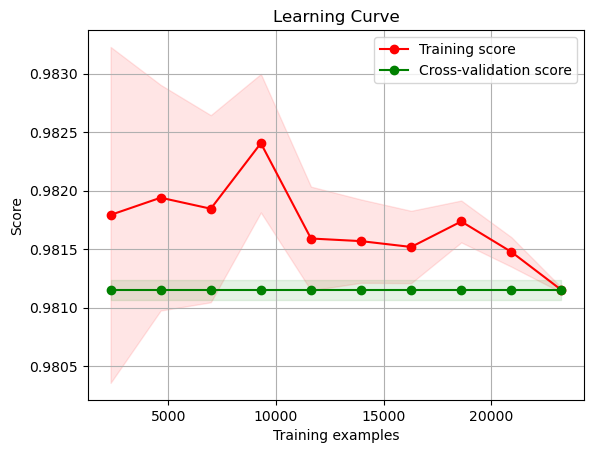

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels

rf = RandomForestClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=10)

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [33]:
# 创建K-NN分类器实例
knn = KNeighborsClassifier(algorithm='ball_tree')

# 定义超参数网格
param_grid = {
    'n_neighbors': [200, 300],  # 更多或更少的值
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [20, 30, 40],  # 更多或更少的值
    'p': [2]
}




# 创建网格搜索实例
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=rskf, n_jobs=-1, verbose=1)

# 执行网格搜索
grid_search.fit(X, y)

# 输出最优参数
print("Best parameters:", grid_search.best_params_)

# 输出最优模型的评分
print("Best score:", grid_search.best_score_)

# 获取并输出最优模型
best_model = grid_search.best_estimator_
print("Best model: ", best_model)

Fitting 15 folds for each of 36 candidates, totalling 540 fits
Best parameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 200, 'p': 2, 'weights': 'uniform'}
Best score: 0.9811502522597187
Best model:  KNeighborsClassifier(leaf_size=20, n_neighbors=200)


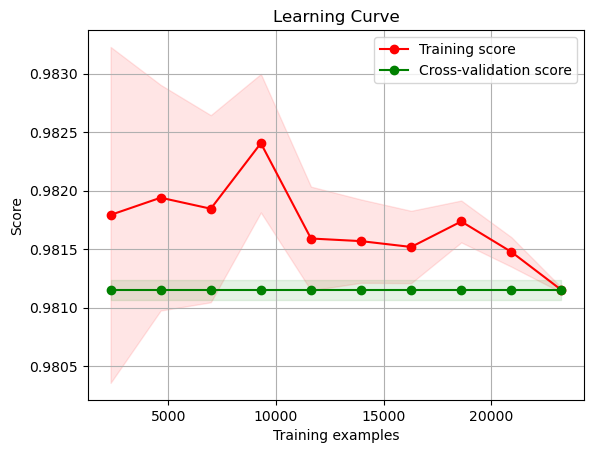

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels

knn = KNeighborsClassifier(leaf_size=20, n_neighbors=200, weights= 'uniform')

# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    knn, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [21]:
# 定义超参数网格
param_grid = {'var_smoothing': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

# 定义模型
gnb = GaussianNB()

# 创建 RepeatedStratifiedKFold 实例，可用作cv参数
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# 创建网格搜索实例
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=rskf, n_jobs=-1, verbose=1)

# 进行网格搜索
grid_search.fit(X, y)

# 输出最优参数
print("Best parameters:", grid_search.best_params_)

# 输出最优模型的评分
print("Best score:", grid_search.best_score_)

# 获取并输出最优模型
best_model = grid_search.best_estimator_
print("Best model: ", best_model)

Fitting 15 folds for each of 5 candidates, totalling 75 fits
Best parameters: {'var_smoothing': 0.1}
Best score: 0.9806916365878589
Best model:  GaussianNB(var_smoothing=0.1)


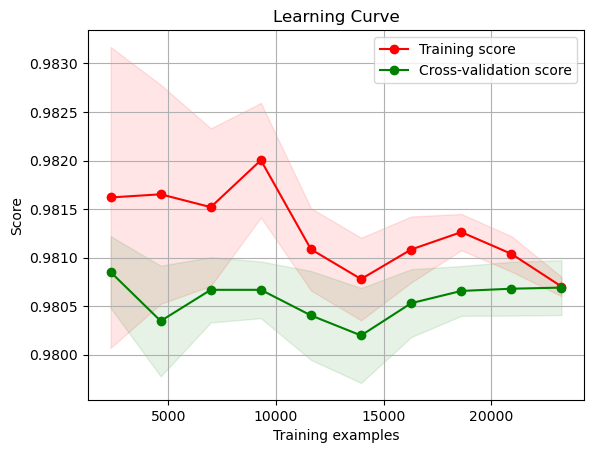

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels
gnb = GaussianNB(var_smoothing=0.1)
# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    gnb, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [34]:
raw_base_learners_new = [
    ('Random Forest', RandomForestClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=10, n_jobs=-1)),
    ('Decision Tree', DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter='best')),
    ('Logistic Regression', LogisticRegression(C=0.001, max_iter=10000, n_jobs=-1, solver='newton-cg')),
    ('KNN', KNeighborsClassifier(leaf_size=20, n_neighbors=200, weights= 'uniform', n_jobs=-1)),
    ('Naive Bayes', GaussianNB(var_smoothing=1e-9)),
    ('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis(reg_param=0.1111111111111111, tol=0.001)),
    ('LinearDiscriminant', LinearDiscriminantAnalysis(priors=None, shrinkage=None, solver='svd'))
]



# Names for the learners
learner_names = ['rf', 'dt', 'lr', 'knn', 'nb', 'qda', 'lda']

# Calibrate each of the base learners
calibrated_learners = [(name, CalibratedClassifierCV(learner, method='isotonic', cv=5)) 
                       for name, learner in raw_base_learners_new]


rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

In [10]:
def convert_to_indicator(y):
    """Converts a binary vector to an indicator matrix."""
    n = len(y)
    indicator = np.zeros((n, 2))
    indicator[np.arange(n), y] = 1
    return indicator

In [12]:
base_qda = QuadraticDiscriminantAnalysis(reg_param=0.1111111111111111, tol=0.001)
calibrated_final_estimator_qda = CalibratedClassifierCV(base_qda, method='isotonic', cv=5)

probas_qda_dict = {
    "_qda": [],
    "stack_qda_0": [],
    "stack_qda_1": [],
    "stack_qda_2": [],
    "stack_qda_3": []
}

true_qda_labels = []

stack0_qda_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_qda, n_jobs=-1)
stack1_qda_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_qda, n_jobs=-1)
stack2_qda_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_qda, n_jobs=-1)
stack3_qda_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_qda, n_jobs=-1)



results_qda = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the qda
    base_qda.fit(X_train, y_train)
    probas_base_qda_test = base_qda.predict_proba(X_test)
    probas_qda_dict["_qda"].append(probas_base_qda_test)  # Store the predicted probabilities
    
    # Train the stack0
    stack0_qda_uncalibrated.fit(X_train, y_train)
    probas_qda_test_stack0 = stack0_qda_uncalibrated.predict_proba(X_test)
    probas_qda_dict["stack_qda_0"].append(probas_qda_test_stack0)  # Store the predicted probabilities    
    
    
    # Train the stack1
    stack1_qda_partially_calibrated.fit(X_train, y_train)
    probas_qda_test_stack1 = stack1_qda_partially_calibrated.predict_proba(X_test)
    probas_qda_dict["stack_qda_1"].append(probas_qda_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_qda_partially_calibrated.fit(X_train, y_train)
    probas_qda_test_stack2 = stack2_qda_partially_calibrated.predict_proba(X_test)
    probas_qda_dict["stack_qda_2"].append(probas_qda_test_stack2)  # Store the predicted probabilities
    
    
    # Train the stack3
    stack3_qda_fully_calibrated.fit(X_train, y_train)
    probas_qda_test_stack3 = stack3_qda_fully_calibrated.predict_proba(X_test)
    probas_qda_dict["stack_qda_3"].append(probas_qda_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_qda_labels.extend(y_test.tolist())
    
    
    # Calculate evaluation metrics for qda
    
    acc_cal_qda = accuracy_score(y_test, np.argmax(probas_base_qda_test, axis=1))
    brier_cal_qda = brier_score(y_true_indicator, probas_base_qda_test)
    ece_cal_qda = ECE(y_true=y_true_indicator, probs=probas_base_qda_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_qda = MCE(y_true=y_test.values.tolist(), probs=probas_base_qda_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_qda = cross_entropy(y_true_indicator, probas_base_qda_test)
    roc_auc_cal_qda = roc_auc_score(y_test, probas_base_qda_test[:, 1])    
    

    # Calculate evaluation metrics for stack0
    acc_cal_qda_stack0 = accuracy_score(y_test, np.argmax(probas_qda_test_stack0, axis=1))
    brier_cal_qda_stack0 = brier_score(y_true_indicator, probas_qda_test_stack0)
    ece_cal_qda_stack0 = ECE(y_true=y_true_indicator, probs=probas_qda_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_qda_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_qda_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_qda_stack0 = cross_entropy(y_true_indicator, probas_qda_test_stack0)
    roc_auc_cal_qda_stack0 = roc_auc_score(y_test, probas_qda_test_stack1[:, 1])    
    
        
    # Calculate evaluation metrics for stack1
    acc_cal_qda_stack1 = accuracy_score(y_test, np.argmax(probas_qda_test_stack1, axis=1))
    brier_cal_qda_stack1 = brier_score(y_true_indicator, probas_qda_test_stack1)
    ece_cal_qda_stack1 = ECE(y_true=y_true_indicator, probs=probas_qda_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_qda_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_qda_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_qda_stack1 = cross_entropy(y_true_indicator, probas_qda_test_stack1)
    roc_auc_cal_qda_stack1 = roc_auc_score(y_test, probas_qda_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_qda_stack2 = accuracy_score(y_test, np.argmax(probas_qda_test_stack2, axis=1))
    brier_cal_qda_stack2 = brier_score(y_true_indicator, probas_qda_test_stack2)
    ece_cal_qda_stack2 = ECE(y_true=y_true_indicator, probs=probas_qda_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_qda_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_qda_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_qda_stack2 = cross_entropy(y_true_indicator, probas_qda_test_stack2)
    roc_auc_cal_qda_stack2 = roc_auc_score(y_test, probas_qda_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_qda_stack3 = accuracy_score(y_test, np.argmax(probas_qda_test_stack3, axis=1))
    brier_cal_qda_stack3 = brier_score(y_true_indicator, probas_qda_test_stack3)
    ece_cal_qda_stack3 = ECE(y_true=y_true_indicator, probs=probas_qda_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_qda_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_qda_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_qda_stack3 = cross_entropy(y_true_indicator, probas_qda_test_stack3)
    roc_auc_cal_qda_stack3 = roc_auc_score(y_test, probas_qda_test_stack3[:, 1])

    results_qda.append({    
        'Brier Score (base_qda)': brier_cal_qda,
        'ECE (base_qda)': ece_cal_qda,
        'MCE (base_qda)': mce_cal_qda,
        'Cross-Entropy (base_qda)': ce_cal_qda,
        'Accuracy (base_qda)': acc_cal_qda,
        'ROC AUC (base_qda)': roc_auc_cal_qda,
        
        'Brier Score (stack0_qda_partially_calibrated)': brier_cal_qda_stack0,
        'ECE (stack0_qda_partially_calibrated)': ece_cal_qda_stack0,
        'MCE (stack0_qda_partially_calibrated)': mce_cal_qda_stack0,
        'Cross-Entropy (stack0_qda_partially_calibrated)': ce_cal_qda_stack0,
        'Accuracy (stack0_qda_partially_calibrated)': acc_cal_qda_stack0,
        'ROC AUC (stack0_qda_partially_calibrated)': roc_auc_cal_qda_stack0,
        
        
        'Brier Score (stack1_qda_partially_calibrated)': brier_cal_qda_stack1,
        'ECE (stack1_qda_partially_calibrated)': ece_cal_qda_stack1,
        'MCE (stack1_qda_partially_calibrated)': mce_cal_qda_stack1,
        'Cross-Entropy (stack1_qda_partially_calibrated)': ce_cal_qda_stack1,
        'Accuracy (stack1_qda_partially_calibrated)': acc_cal_qda_stack1,
        'ROC AUC (stack1_qda_partially_calibrated)': roc_auc_cal_qda_stack1,

        'Brier Score (stack2_qda_partially_calibrated)': brier_cal_qda_stack2,
        'ECE (stack2_qda_partially_calibrated)': ece_cal_qda_stack2,
        'MCE (stack2_qda_partially_calibrated)': mce_cal_qda_stack2,
        'Cross-Entropy (stack2_qda_partially_calibrated)': ce_cal_qda_stack2,
        'Accuracy (stack2_qda_partially_calibrated)': acc_cal_qda_stack2,
        'ROC AUC (stack2_qda_partially_calibrated)': roc_auc_cal_qda_stack2,

        'Brier Score (stack3_qda_fully_calibrated)': brier_cal_qda_stack3,
        'ECE (stack3_qda_fully_calibrated)': ece_cal_qda_stack3,
        'MCE (stack3_qda_fully_calibrated)': mce_cal_qda_stack3,
        'Cross-Entropy (stack3_qda_fully_calibrated)': ce_cal_qda_stack3,
        'Accuracy (stack3_qda_fully_calibrated)': acc_cal_qda_stack3,
        'ROC AUC (stack3_qda_fully_calibrated)': roc_auc_cal_qda_stack3,
    })

# Display results
results_qda_df = pd.DataFrame(results_qda)
print("Results for each fold:")
print(results_qda_df)

# Calculate and display the average
avg_results_qda = results_qda_df.mean()
print("\nAverage results:")
print(avg_results_qda)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Results for each fold:
    Brier Score (base_qda)  ECE (base_qda)  MCE (base_qda)  \
0                 0.022598        0.245958        0.138437   
1                 0.025166        0.244880        0.145633   
2                 0.022626        0.246000        0.130752   
3                 0.022976        0.243620        0.153714   
4                 0.023432        0.245645        0.150238   
5                 0.024115        0.244980        0.229486   
6                 0.023059        0.245118        0.212132   
7                 0.023051        0.246774        0.110925   
8                 0.023552        0.245142        0.149550   
9                 0.022373        0.245573        0.173016   
10                0.023417        0.244592        0.125063   
11                0.023056        0.244560        0.147139   
12                0.022076        0.245812        0.162061   
13                0.023978        0.244603        0.155650   
14                0.023537        0.244658     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


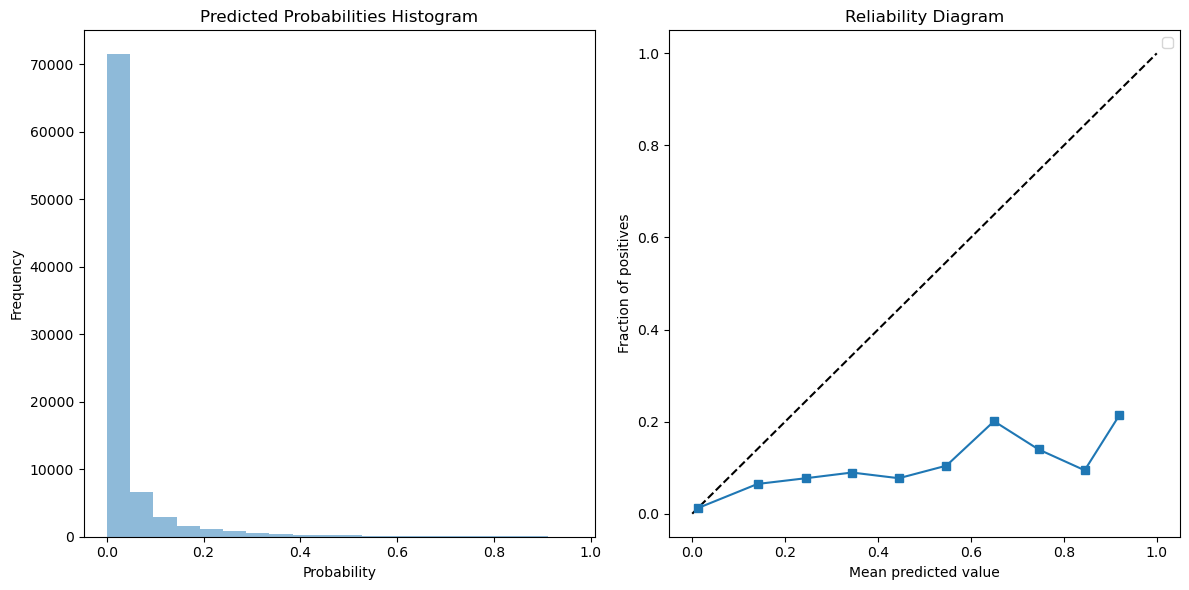

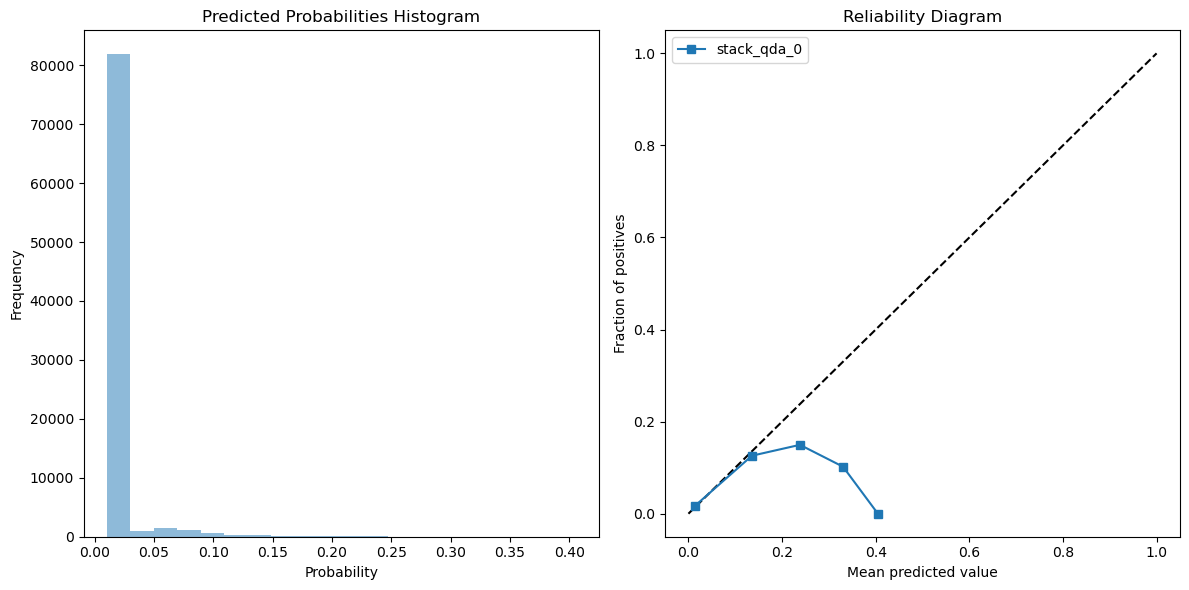

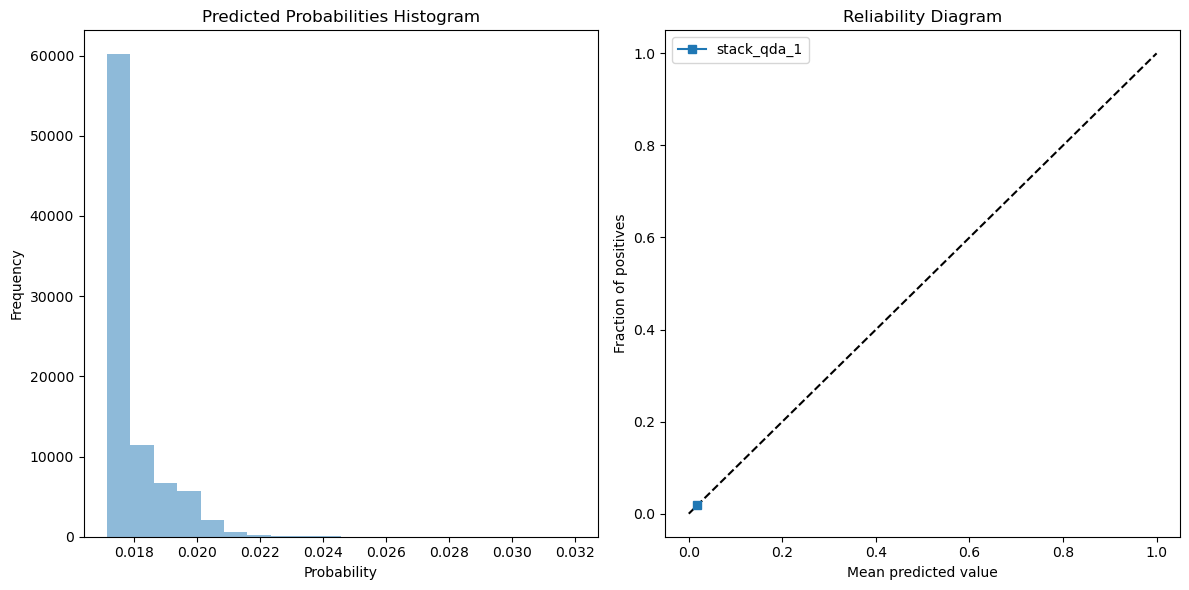

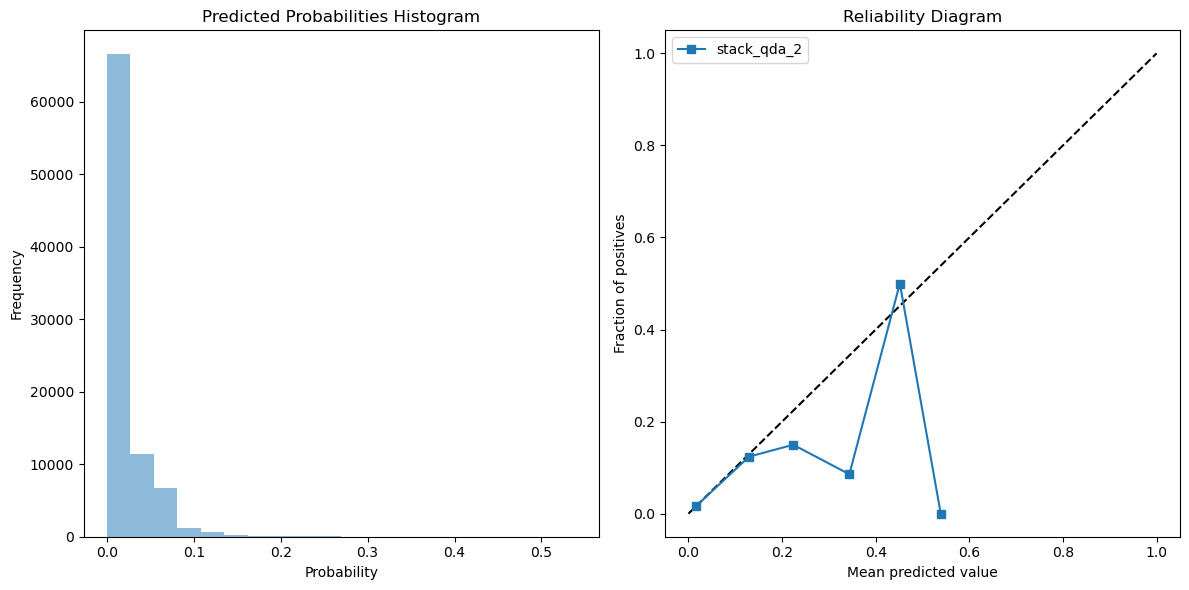

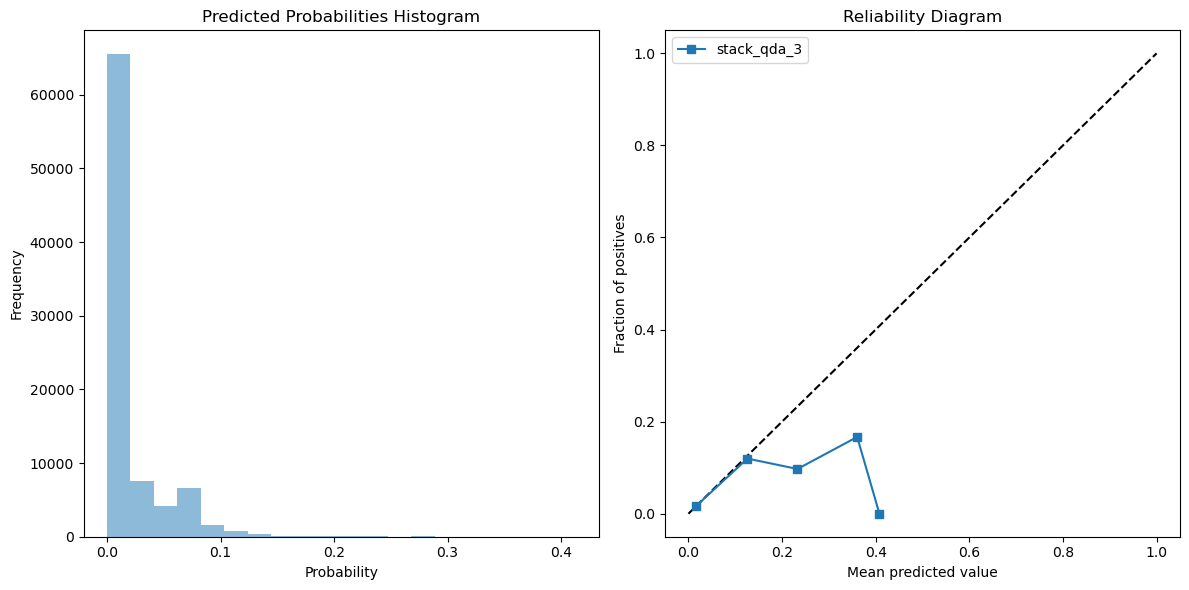

In [13]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 提取预测的概率值（这里我们以正类别为例，您需要根据您的数据适当地选择列）
# 这里假设 probas_qda_dict 中的每个键都对应一个概率数组的列表
# 我们将所有的概率值合并到一个数组中
for key in probas_qda_dict.keys():
    all_probas = np.concatenate(probas_qda_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_qda_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=20, alpha=0.5, label=key)
    plt.title('Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [14]:
base_lda = LinearDiscriminantAnalysis(priors=None, shrinkage=None, solver='svd')
calibrated_final_estimator_lda = CalibratedClassifierCV(base_lda, method='isotonic', cv=5)


probas_lda_dict = {
    "_lda": [],
    "cal_lda": [],
    "stack_lda_0": [],
    "stack_lda_1": [],
    "stack_lda_2": [],
    "stack_lda_3": []
}

true_lda_labels = []

stack0_lda_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_lda, n_jobs=-1)
stack1_lda_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_lda, n_jobs=-1)
stack2_lda_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_lda, n_jobs=-1)
stack3_lda_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_lda, n_jobs=-1)



results_lda = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the lda
    base_lda.fit(X_train, y_train)
    probas_base_lda_test = base_lda.predict_proba(X_test)
    probas_lda_dict["_lda"].append(probas_base_lda_test)  # Store the predicted probabilities
    
    # Train the cal_lda
    calibrated_final_estimator_lda.fit(X_train, y_train)
    probas_cal_lda_test = calibrated_final_estimator_lda.predict_proba(X_test)
    probas_lda_dict["cal_lda"].append(probas_cal_lda_test)  # Store the predicted probabilities  
    
    # Train the stack0
    stack0_lda_uncalibrated.fit(X_train, y_train)
    probas_lda_test_stack0 = stack0_lda_uncalibrated.predict_proba(X_test)
    probas_lda_dict["stack_lda_0"].append(probas_lda_test_stack0)  # Store the predicted probabilities

    # Train the stack1
    stack1_lda_partially_calibrated.fit(X_train, y_train)
    probas_lda_test_stack1 = stack1_lda_partially_calibrated.predict_proba(X_test)
    probas_lda_dict["stack_lda_1"].append(probas_lda_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_lda_partially_calibrated.fit(X_train, y_train)
    probas_lda_test_stack2 = stack2_lda_partially_calibrated.predict_proba(X_test)
    probas_lda_dict["stack_lda_2"].append(probas_lda_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_lda_fully_calibrated.fit(X_train, y_train)
    probas_lda_test_stack3 = stack3_lda_fully_calibrated.predict_proba(X_test)
    probas_lda_dict["stack_lda_3"].append(probas_lda_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_lda_labels.extend(y_test.tolist())

    # Calculate evaluation metrics for lda
    acc_cal_lda = accuracy_score(y_test, np.argmax(probas_base_lda_test, axis=1))
    brier_cal_lda = brier_score(y_true_indicator, probas_base_lda_test)
    ece_cal_lda = ECE(y_true=y_true_indicator, probs=probas_base_lda_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lda = MCE(y_true=y_test.values.tolist(), probs=probas_base_lda_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lda = cross_entropy(y_true_indicator, probas_base_lda_test)
    roc_auc_cal_lda = roc_auc_score(y_test, probas_base_lda_test[:, 1])    

        # Calculate evaluation metrics for cal_lda
    
    acc_cal_cal_lda = accuracy_score(y_test, np.argmax(probas_cal_lda_test, axis=1))
    brier_cal_cal_lda = brier_score(y_true_indicator, probas_cal_lda_test)
    ece_cal_cal_lda = ECE(y_true=y_true_indicator, probs=probas_cal_lda_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_lda = MCE(y_true=y_test.values.tolist(), probs=probas_cal_lda_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_lda = cross_entropy(y_true_indicator, probas_cal_lda_test)
    roc_auc_cal_cal_lda = roc_auc_score(y_test, probas_cal_lda_test[:, 1])    
    
    # Calculate evaluation metrics for stack0
    acc_cal_lda_stack0 = accuracy_score(y_test, np.argmax(probas_lda_test_stack0, axis=1))
    brier_cal_lda_stack0 = brier_score(y_true_indicator, probas_lda_test_stack0)
    ece_cal_lda_stack0 = ECE(y_true=y_true_indicator, probs=probas_lda_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lda_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_lda_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lda_stack0 = cross_entropy(y_true_indicator, probas_lda_test_stack0)
    roc_auc_cal_lda_stack0 = roc_auc_score(y_test, probas_lda_test_stack0[:, 1])    

    
    # Calculate evaluation metrics for stack1
    acc_cal_lda_stack1 = accuracy_score(y_test, np.argmax(probas_lda_test_stack1, axis=1))
    brier_cal_lda_stack1 = brier_score(y_true_indicator, probas_lda_test_stack1)
    ece_cal_lda_stack1 = ECE(y_true=y_true_indicator, probs=probas_lda_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lda_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_lda_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lda_stack1 = cross_entropy(y_true_indicator, probas_lda_test_stack1)
    roc_auc_cal_lda_stack1 = roc_auc_score(y_test, probas_lda_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_lda_stack2 = accuracy_score(y_test, np.argmax(probas_lda_test_stack2, axis=1))
    brier_cal_lda_stack2 = brier_score(y_true_indicator, probas_lda_test_stack2)
    ece_cal_lda_stack2 = ECE(y_true=y_true_indicator, probs=probas_lda_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lda_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_lda_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lda_stack2 = cross_entropy(y_true_indicator, probas_lda_test_stack2)
    roc_auc_cal_lda_stack2 = roc_auc_score(y_test, probas_lda_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_lda_stack3 = accuracy_score(y_test, np.argmax(probas_lda_test_stack3, axis=1))
    brier_cal_lda_stack3 = brier_score(y_true_indicator, probas_lda_test_stack3)
    ece_cal_lda_stack3 = ECE(y_true=y_true_indicator, probs=probas_lda_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lda_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_lda_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lda_stack3 = cross_entropy(y_true_indicator, probas_lda_test_stack3)
    roc_auc_cal_lda_stack3 = roc_auc_score(y_test, probas_lda_test_stack3[:, 1])

    results_lda.append({    
        'Brier Score (base_lda)': brier_cal_lda,
        'ECE (base_lda)': ece_cal_lda,
        'MCE (base_lda)': mce_cal_lda,
        'Cross-Entropy (base_lda)': ce_cal_lda,
        'Accuracy (base_lda)': acc_cal_lda,
        'ROC AUC (base_lda)': roc_auc_cal_lda,
        
        'Brier Score (cal_lda)': brier_cal_cal_lda,
        'ECE (cal_lda)': ece_cal_cal_lda,
        'MCE (cal_lda)': mce_cal_cal_lda,
        'Cross-Entropy (cal_lda)': ce_cal_cal_lda,
        'Accuracy (cal_lda)': acc_cal_cal_lda,
        'ROC AUC (cal_lda)': roc_auc_cal_cal_lda,        
        
        
        'Brier Score (stack0_lda_partially_calibrated)': brier_cal_lda_stack0,
        'ECE (stack0_lda_partially_calibrated)': ece_cal_lda_stack0,
        'MCE (stack0_lda_partially_calibrated)': mce_cal_lda_stack0,
        'Cross-Entropy (stack0_lda_partially_calibrated)': ce_cal_lda_stack0,
        'Accuracy (stack0_lda_partially_calibrated)': acc_cal_lda_stack0,
        'ROC AUC (stack0_lda_partially_calibrated)': roc_auc_cal_lda_stack0,
        
        
        'Brier Score (stack1_lda_partially_calibrated)': brier_cal_lda_stack1,
        'ECE (stack1_lda_partially_calibrated)': ece_cal_lda_stack1,
        'MCE (stack1_lda_partially_calibrated)': mce_cal_lda_stack1,
        'Cross-Entropy (stack1_lda_partially_calibrated)': ce_cal_lda_stack1,
        'Accuracy (stack1_lda_partially_calibrated)': acc_cal_lda_stack1,
        'ROC AUC (stack1_lda_partially_calibrated)': roc_auc_cal_lda_stack1,

        'Brier Score (stack2_lda_partially_calibrated)': brier_cal_lda_stack2,
        'ECE (stack2_lda_partially_calibrated)': ece_cal_lda_stack2,
        'MCE (stack2_lda_partially_calibrated)': mce_cal_lda_stack2,
        'Cross-Entropy (stack2_lda_partially_calibrated)': ce_cal_lda_stack2,
        'Accuracy (stack2_lda_partially_calibrated)': acc_cal_lda_stack2,
        'ROC AUC (stack2_lda_partially_calibrated)': roc_auc_cal_lda_stack2,

        'Brier Score (stack3_lda_fully_calibrated)': brier_cal_lda_stack3,
        'ECE (stack3_lda_fully_calibrated)': ece_cal_lda_stack3,
        'MCE (stack3_lda_fully_calibrated)': mce_cal_lda_stack3,
        'Cross-Entropy (stack3_lda_fully_calibrated)': ce_cal_lda_stack3,
        'Accuracy (stack3_lda_fully_calibrated)': acc_cal_lda_stack3,
        'ROC AUC (stack3_lda_fully_calibrated)': roc_auc_cal_lda_stack3,
    })

# Display results
results_lda_df = pd.DataFrame(results_lda)
print("Results for each fold:")
print(results_lda_df)

# Calculate and display the average
avg_results_lda = results_lda_df.mean()
print("\nAverage results:")
print(avg_results_lda)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Results for each fold:
    Brier Score (base_lda)  ECE (base_lda)  MCE (base_lda)  \
0                 0.019398        0.245444        0.241641   
1                 0.020417        0.245183        0.184601   
2                 0.019078        0.246225        0.247497   
3                 0.020605        0.242664        0.235348   
4                 0.019895        0.245027        0.204211   
5                 0.020687        0.244332        0.165195   
6                 0.019827        0.244568        0.317864   
7                 0.019201        0.246536        0.183710   
8                 0.020130        0.244344        0.171810   
9                 0.019200        0.244712        0.185023   
10                0.019141        0.243997        0.173096   
11                0.020071        0.244251        0.218443   
12                0.019003        0.245344        0.256803   
13                0.019996        0.244320        0.298086   
14                0.020694        0.245255     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


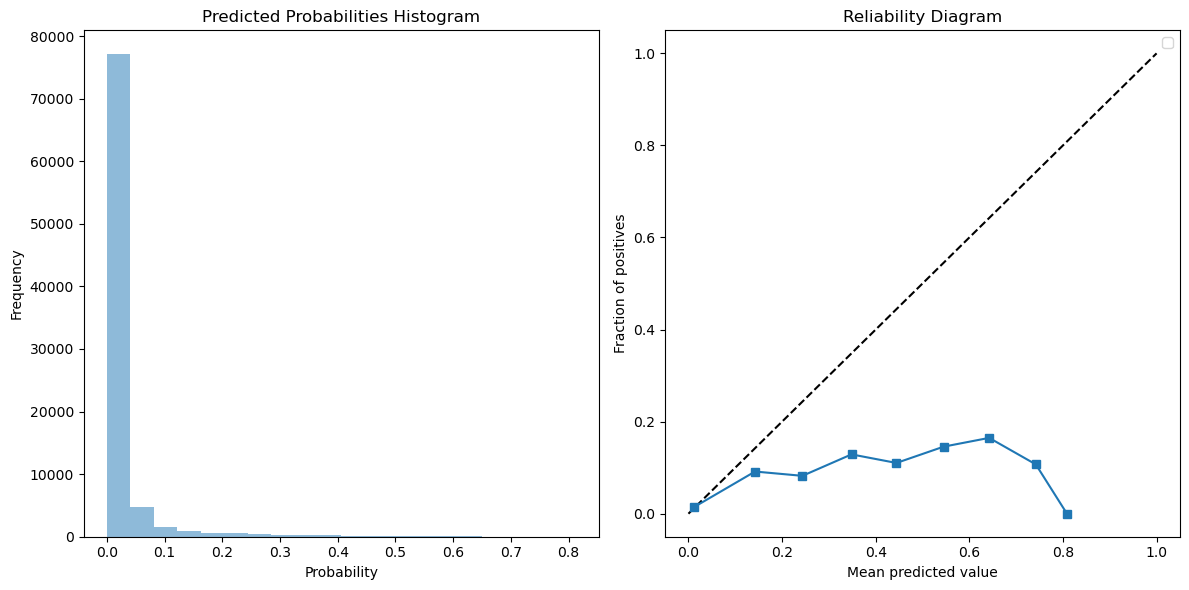

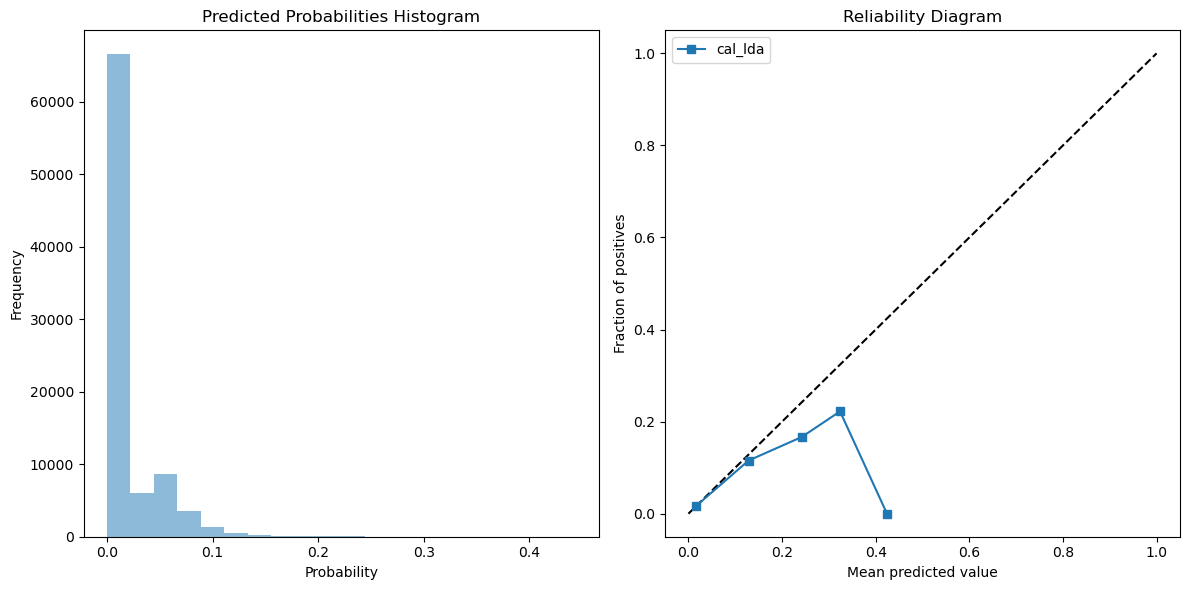

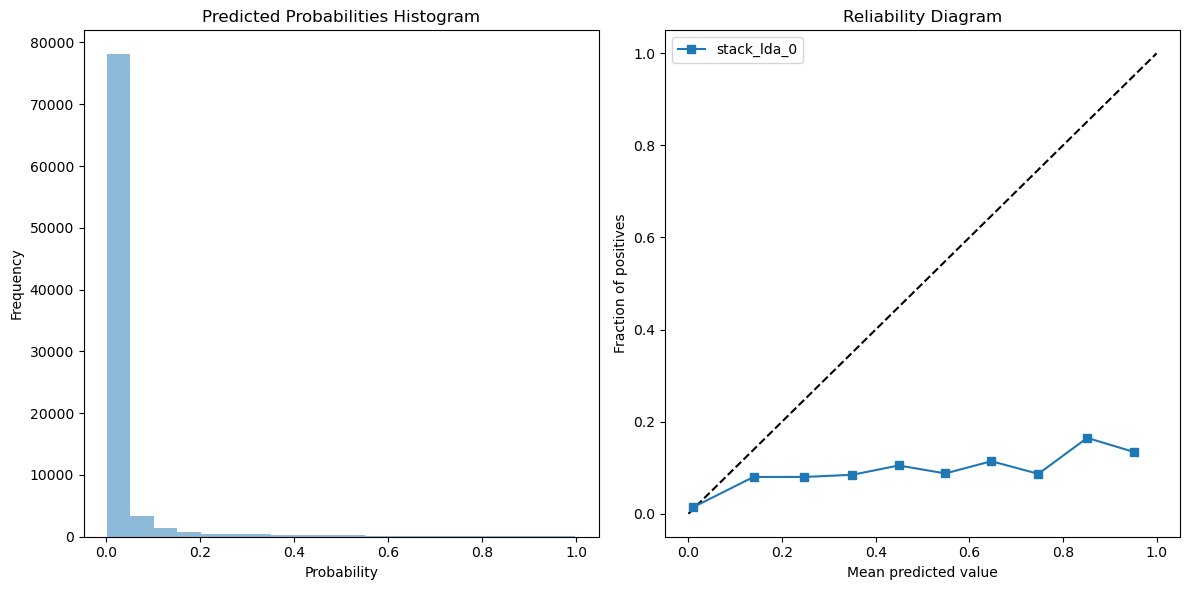

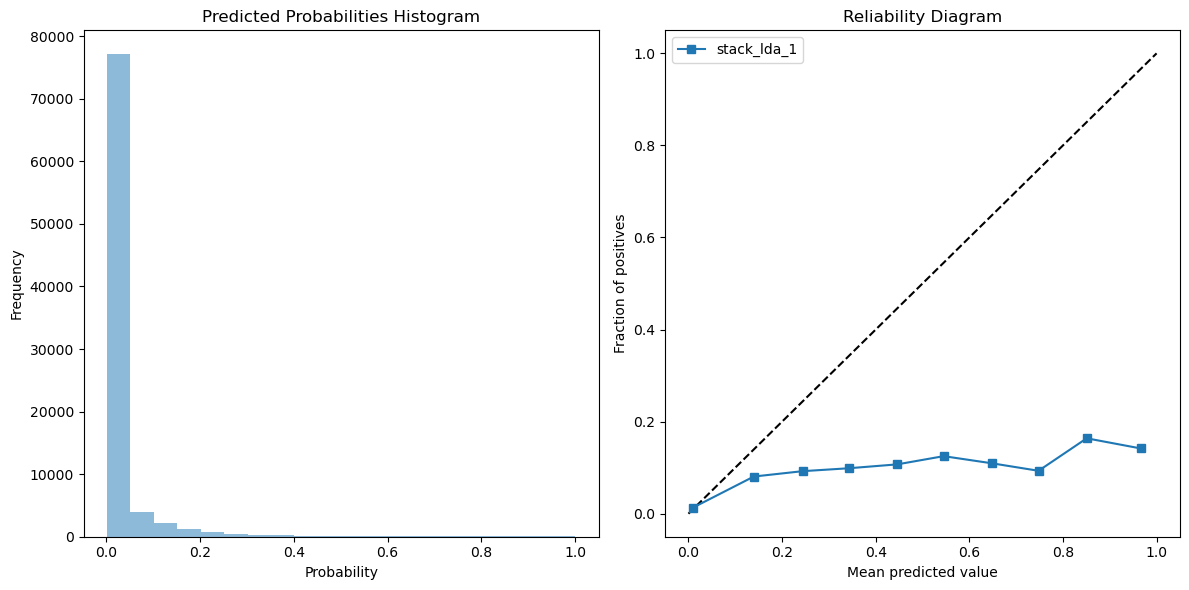

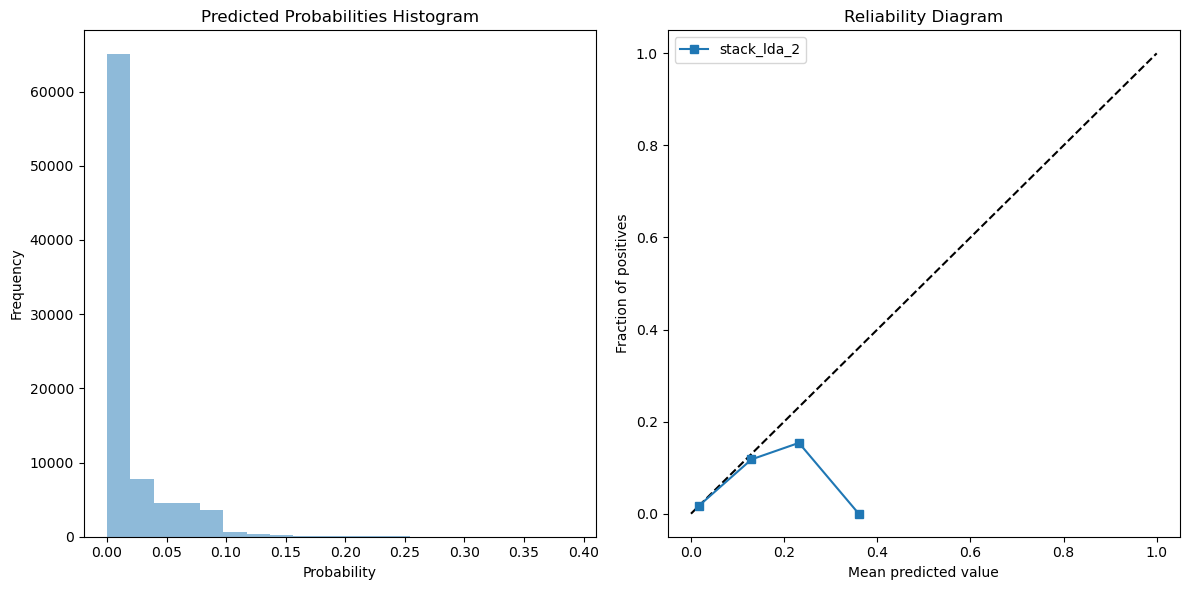

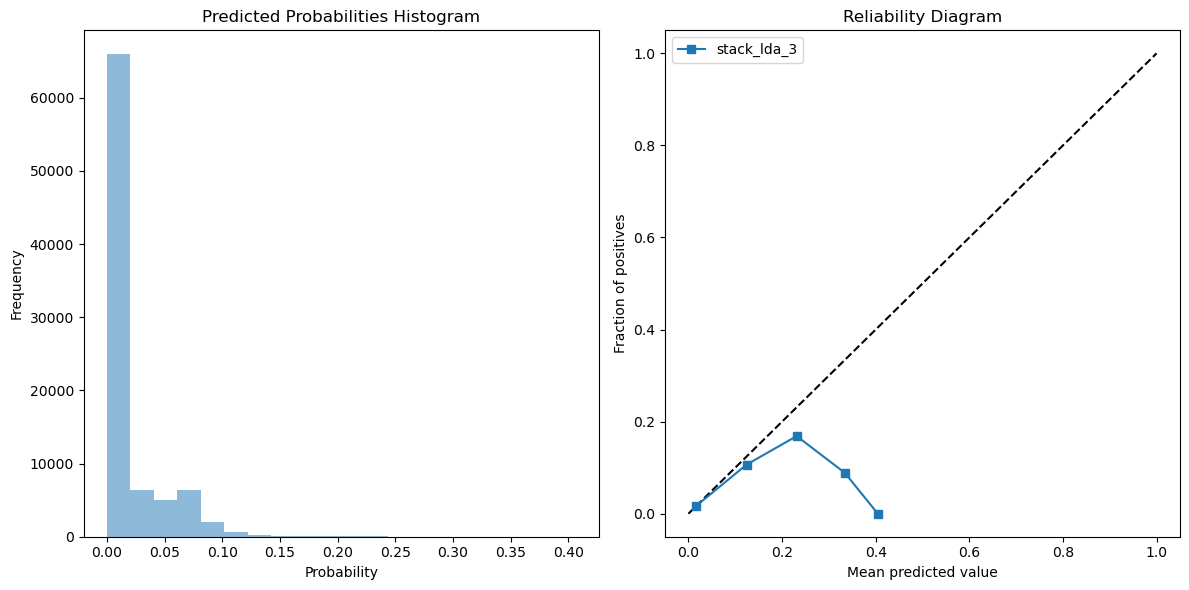

In [15]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 提取预测的概率值（这里我们以正类别为例，您需要根据您的数据适当地选择列）
# 这里假设 probas_qda_dict 中的每个键都对应一个概率数组的列表
# 我们将所有的概率值合并到一个数组中
for key in probas_lda_dict.keys():
    all_probas = np.concatenate(probas_lda_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_lda_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=20, alpha=0.5, label=key)
    plt.title('Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [32]:
base_lr = LogisticRegression(C=0.001, max_iter=10000, n_jobs=-1, solver='newton-cg')
calibrated_final_estimator_lr = CalibratedClassifierCV(base_lr, method='isotonic', cv=5)


probas_lr_dict = {
    "_lr": [],
    "cal_lr": [],
    "stack_lr_0": [],
    "stack_lr_1": [],
    "stack_lr_2": [],
    "stack_lr_3": []
}

true_lr_labels = []

stack0_lr_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_lr, n_jobs=-1)
stack1_lr_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_lr, n_jobs=-1)
stack2_lr_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_lr, n_jobs=-1)
stack3_lr_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_lr, n_jobs=-1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

results_lr = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the lr
    base_lr.fit(X_train, y_train)
    probas_base_lr_test = base_lr.predict_proba(X_test)
    probas_lr_dict["_lr"].append(probas_base_lr_test)  # Store the predicted probabilities
    
    # Train the cal_lr
    calibrated_final_estimator_lr.fit(X_train, y_train)
    probas_cal_lr_test = calibrated_final_estimator_lr.predict_proba(X_test)
    probas_lr_dict["cal_lr"].append(probas_cal_lr_test)  # Store the predicted probabilities 
    
    # Train the stack0
    stack0_lr_uncalibrated.fit(X_train, y_train)
    probas_lr_test_stack0 = stack0_lr_uncalibrated.predict_proba(X_test)
    probas_lr_dict["stack_lr_0"].append(probas_lr_test_stack0)  # Store the predicted probabilities    
    # Train the stack1
    stack1_lr_partially_calibrated.fit(X_train, y_train)
    probas_lr_test_stack1 = stack1_lr_partially_calibrated.predict_proba(X_test)
    probas_lr_dict["stack_lr_1"].append(probas_lr_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_lr_partially_calibrated.fit(X_train, y_train)
    probas_lr_test_stack2 = stack2_lr_partially_calibrated.predict_proba(X_test)
    probas_lr_dict["stack_lr_2"].append(probas_lr_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_lr_fully_calibrated.fit(X_train, y_train)
    probas_lr_test_stack3 = stack3_lr_fully_calibrated.predict_proba(X_test)
    probas_lr_dict["stack_lr_3"].append(probas_lr_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_lr_labels.extend(y_test.tolist())

    # Calculate evaluation metrics for lr
    acc_cal_lr = accuracy_score(y_test, np.argmax(probas_base_lr_test, axis=1))
    brier_cal_lr = brier_score(y_true_indicator, probas_base_lr_test)
    ece_cal_lr = ECE(y_true=y_true_indicator, probs=probas_base_lr_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lr = MCE(y_true=y_test.values.tolist(), probs=probas_base_lr_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lr = cross_entropy(y_true_indicator, probas_base_lr_test)
    roc_auc_cal_lr = roc_auc_score(y_test, probas_base_lr_test[:, 1])    

    # Calculate evaluation metrics for cal_lr
    
    acc_cal_cal_lr = accuracy_score(y_test, np.argmax(probas_cal_lr_test, axis=1))
    brier_cal_cal_lr = brier_score(y_true_indicator, probas_cal_lr_test)
    ece_cal_cal_lr = ECE(y_true=y_true_indicator, probs=probas_cal_lr_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_lr = MCE(y_true=y_test.values.tolist(), probs=probas_cal_lr_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_lr = cross_entropy(y_true_indicator, probas_cal_lr_test)
    roc_auc_cal_cal_lr = roc_auc_score(y_test, probas_cal_lr_test[:, 1])    
    
    
    
    # Calculate evaluation metrics for stack0
    acc_cal_lr_stack0 = accuracy_score(y_test, np.argmax(probas_lr_test_stack0, axis=1))
    brier_cal_lr_stack0 = brier_score(y_true_indicator, probas_lr_test_stack0)
    ece_cal_lr_stack0 = ECE(y_true=y_true_indicator, probs=probas_lr_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lr_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_lr_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lr_stack0 = cross_entropy(y_true_indicator, probas_lr_test_stack0)
    roc_auc_cal_lr_stack0 = roc_auc_score(y_test, probas_lr_test_stack0[:, 1])    
    
   
    # Calculate evaluation metrics for stack1
    acc_cal_lr_stack1 = accuracy_score(y_test, np.argmax(probas_lr_test_stack1, axis=1))
    brier_cal_lr_stack1 = brier_score(y_true_indicator, probas_lr_test_stack1)
    ece_cal_lr_stack1 = ECE(y_true=y_true_indicator, probs=probas_lr_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lr_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_lr_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lr_stack1 = cross_entropy(y_true_indicator, probas_lr_test_stack1)
    roc_auc_cal_lr_stack1 = roc_auc_score(y_test, probas_lr_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_lr_stack2 = accuracy_score(y_test, np.argmax(probas_lr_test_stack2, axis=1))
    brier_cal_lr_stack2 = brier_score(y_true_indicator, probas_lr_test_stack2)
    ece_cal_lr_stack2 = ECE(y_true=y_true_indicator, probs=probas_lr_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lr_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_lr_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lr_stack2 = cross_entropy(y_true_indicator, probas_lr_test_stack2)
    roc_auc_cal_lr_stack2 = roc_auc_score(y_test, probas_lr_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_lr_stack3 = accuracy_score(y_test, np.argmax(probas_lr_test_stack3, axis=1))
    brier_cal_lr_stack3 = brier_score(y_true_indicator, probas_lr_test_stack3)
    ece_cal_lr_stack3 = ECE(y_true=y_true_indicator, probs=probas_lr_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_lr_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_lr_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_lr_stack3 = cross_entropy(y_true_indicator, probas_lr_test_stack3)
    roc_auc_cal_lr_stack3 = roc_auc_score(y_test, probas_lr_test_stack3[:, 1])

    results_lr.append({
        'Brier Score (base_lr)': brier_cal_lr,
        'ECE (base_lr)': ece_cal_lr,
        'MCE (base_lr)': mce_cal_lr,
        'Cross-Entropy (base_lr)': ce_cal_lr,
        'Accuracy (base_lr)': acc_cal_lr,
        'ROC AUC (base_lr)': roc_auc_cal_lr,
        
        'Brier Score (cal_lr)': brier_cal_cal_lr,
        'ECE (cal_lr)': ece_cal_cal_lr,
        'MCE (cal_lr)': mce_cal_cal_lr,
        'Cross-Entropy (cal_lr)': ce_cal_cal_lr,
        'Accuracy (cal_lr)': acc_cal_cal_lr,
        'ROC AUC (cal_lr)': roc_auc_cal_cal_lr,     
        
        'Brier Score (stack0_lr_partially_calibrated)': brier_cal_lr_stack0,
        'ECE (stack0_lr_partially_calibrated)': ece_cal_lr_stack0,
        'MCE (stack0_lr_partially_calibrated)': mce_cal_lr_stack0,
        'Cross-Entropy (stack0_lr_partially_calibrated)': ce_cal_lr_stack0,
        'Accuracy (stack0_lr_partially_calibrated)': acc_cal_lr_stack0,
        'ROC AUC (stack0_lr_partially_calibrated)': roc_auc_cal_lr_stack0,
        
        'Brier Score (stack1_lr_partially_calibrated)': brier_cal_lr_stack1,
        'ECE (stack1_lr_partially_calibrated)': ece_cal_lr_stack1,
        'MCE (stack1_lr_partially_calibrated)': mce_cal_lr_stack1,
        'Cross-Entropy (stack1_lr_partially_calibrated)': ce_cal_lr_stack1,
        'Accuracy (stack1_lr_partially_calibrated)': acc_cal_lr_stack1,
        'ROC AUC (stack1_lr_partially_calibrated)': roc_auc_cal_lr_stack1,

        'Brier Score (stack2_lr_partially_calibrated)': brier_cal_lr_stack2,
        'ECE (stack2_lr_partially_calibrated)': ece_cal_lr_stack2,
        'MCE (stack2_lr_partially_calibrated)': mce_cal_lr_stack2,
        'Cross-Entropy (stack2_lr_partially_calibrated)': ce_cal_lr_stack2,
        'Accuracy (stack2_lr_partially_calibrated)': acc_cal_lr_stack2,
        'ROC AUC (stack2_lr_partially_calibrated)': roc_auc_cal_lr_stack2,

        'Brier Score (stack3_lr_fully_calibrated)': brier_cal_lr_stack3,
        'ECE (stack3_lr_fully_calibrated)': ece_cal_lr_stack3,
        'MCE (stack3_lr_fully_calibrated)': mce_cal_lr_stack3,
        'Cross-Entropy (stack3_lr_fully_calibrated)': ce_cal_lr_stack3,
        'Accuracy (stack3_lr_fully_calibrated)': acc_cal_lr_stack3,
        'ROC AUC (stack3_lr_fully_calibrated)': roc_auc_cal_lr_stack3,
    })

# Display results
results_lr_df = pd.DataFrame(results_lr)
print("Results for each fold:")
print(results_lr_df)

# Calculate and display the average
avg_results_lr = results_lr_df.mean()
print("\nAverage results:")
print(avg_results_lr)


/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Results for each fold:
    Brier Score (base_lr)  ECE (base_lr)  MCE (base_lr)  \
0                0.017903       0.244028       0.027361   
1                0.018022       0.243635       0.053464   
2                0.017636       0.244222       0.014362   
3                0.017911       0.241982       0.141693   
4                0.017861       0.244026       0.007967   
5                0.017910       0.242937       0.075760   
6                0.017725       0.243783       0.041434   
7                0.017856       0.245342       0.026271   
8                0.017835       0.243437       0.069273   
9                0.017983       0.243956       0.008114   
10               0.017913       0.242728       0.035482   
11               0.017874       0.242758       0.059950   
12               0.017643       0.244244       0.126586   
13               0.017812       0.242952       0.065220   
14               0.018043       0.244061       0.107827   

    Cross-Entropy (base_lr)  Acc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


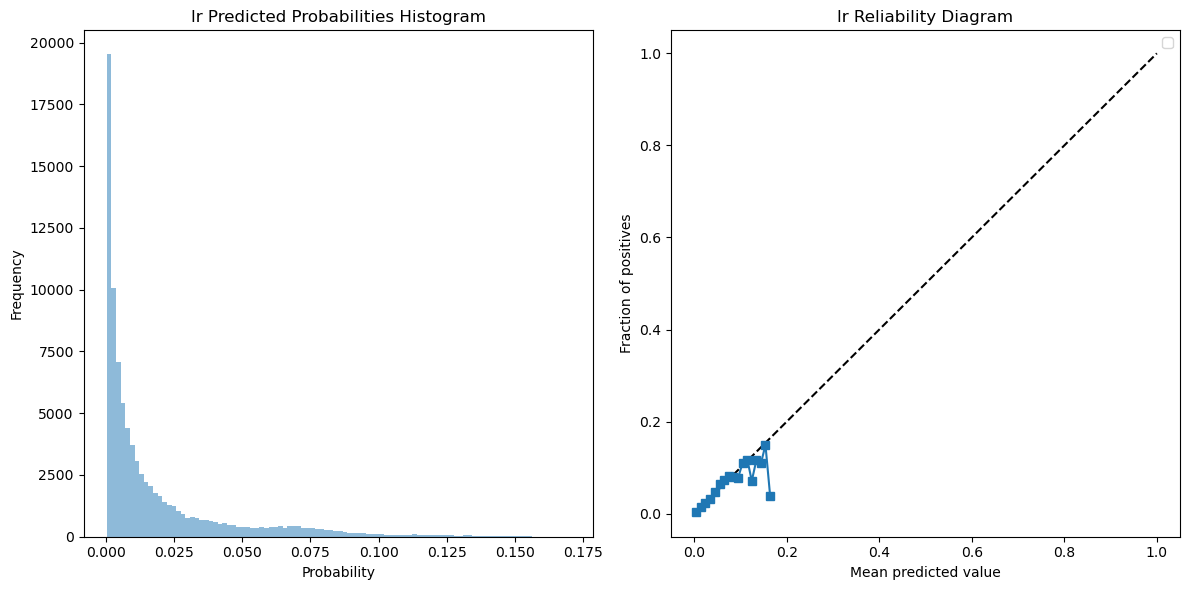

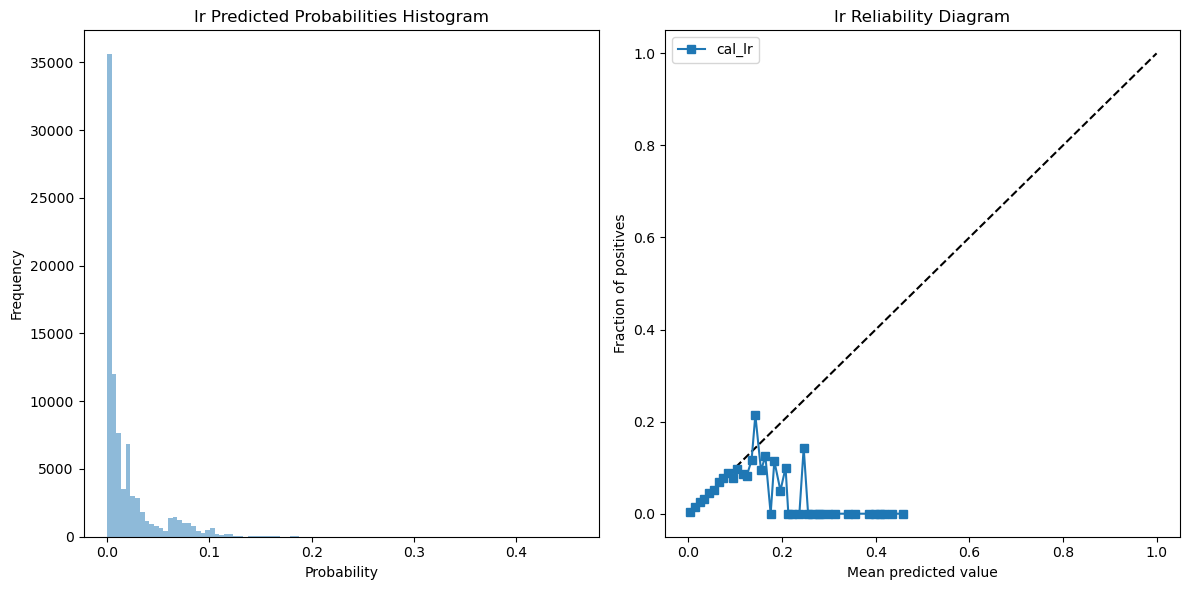

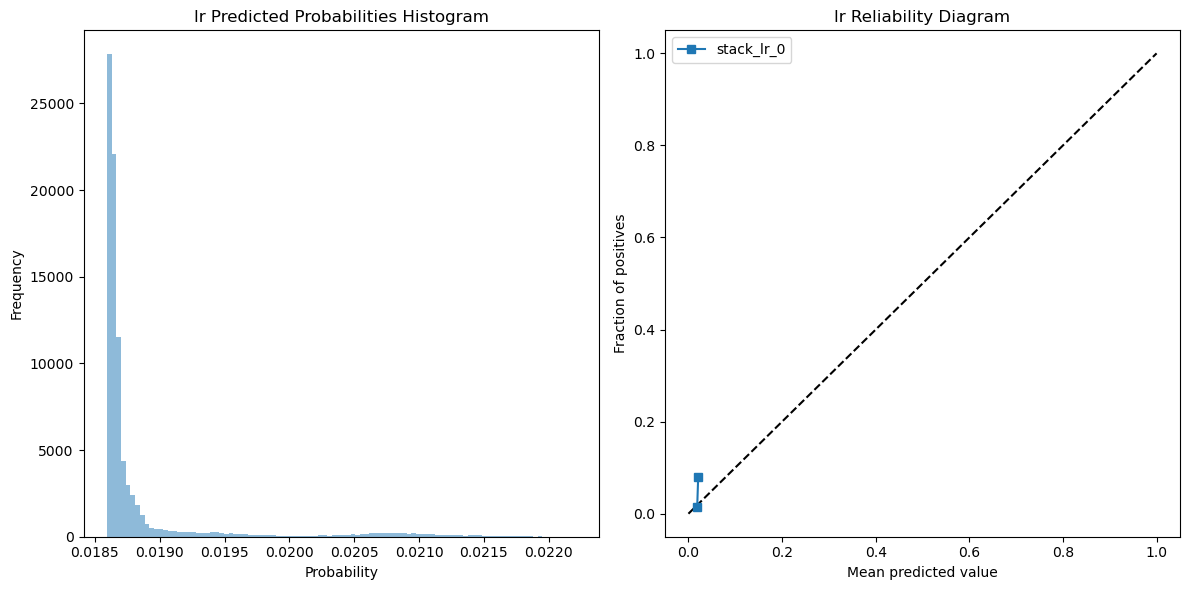

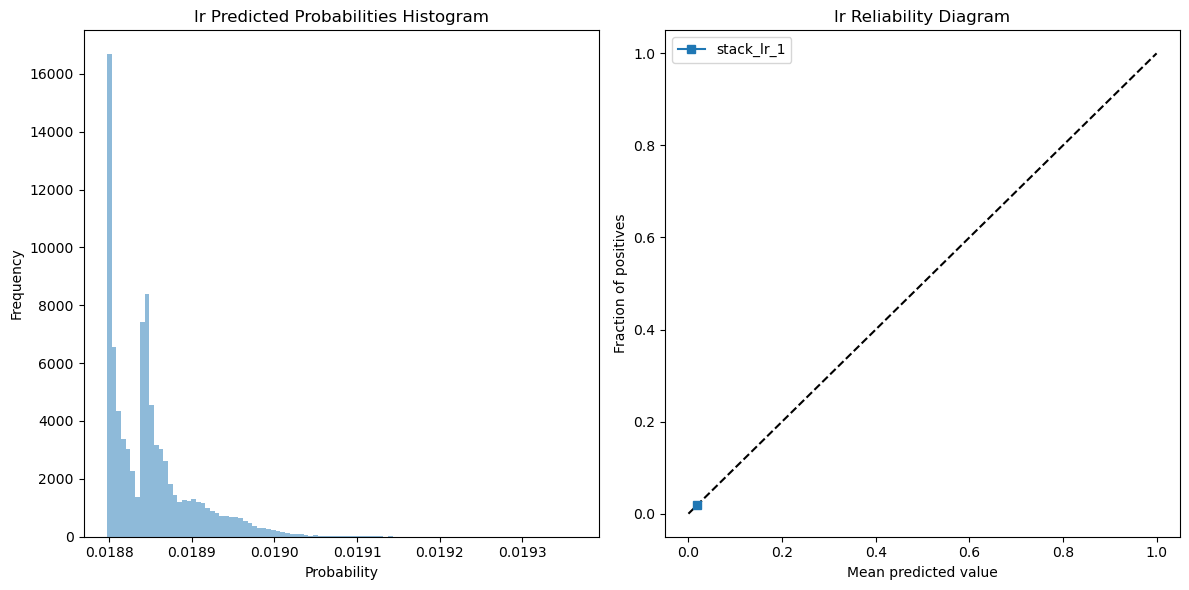

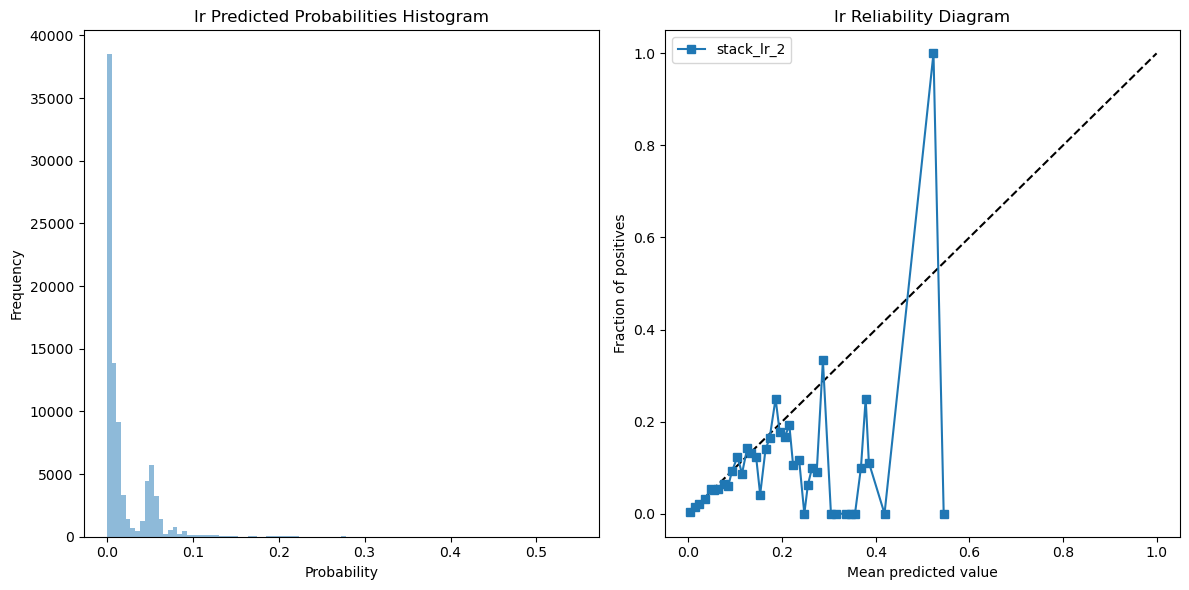

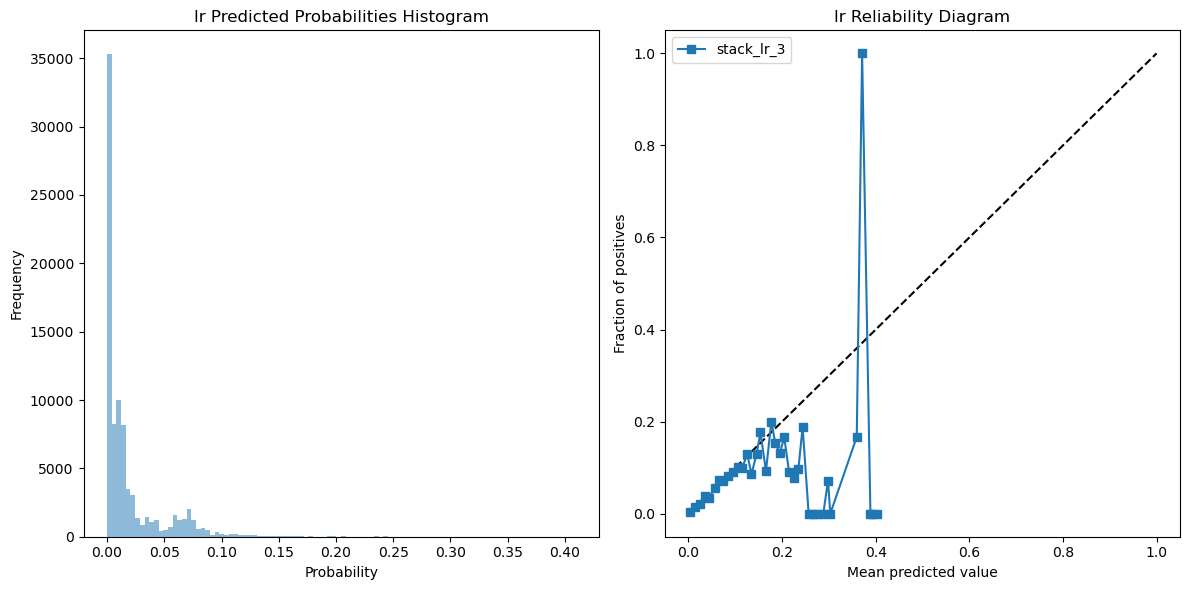

In [33]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 提取预测的概率值（这里我们以正类别为例，您需要根据您的数据适当地选择列）
# 这里假设 probas_qda_dict 中的每个键都对应一个概率数组的列表
# 我们将所有的概率值合并到一个数组中
for key in probas_lr_dict.keys():
    all_probas = np.concatenate(probas_lr_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_lr_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=100, alpha=0.5, label=key)
    plt.title('lr Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=100)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('lr Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [36]:
base_dt = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=5, min_samples_split=5, splitter='best')
calibrated_final_estimator_dt = CalibratedClassifierCV(base_dt, method='isotonic', cv=5)
stack1_dt_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_dt, n_jobs=-1)
stack2_dt_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_dt, n_jobs=-1) 
stack3_dt_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_dt, n_jobs=-1)

probas_dt_dict = {
    "_dt": [],
    "cal_dt": [],
    "stack_dt_0": [],
    "stack_dt_1": [],
    "stack_dt_2": [],
    "stack_dt_3": []
}

true_dt_labels = []

stack0_dt_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_dt, n_jobs=-1)
stack1_dt_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_dt, n_jobs=-1)
stack2_dt_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_dt, n_jobs=-1)
stack3_dt_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_dt, n_jobs=-1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

results_dt = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the dt
    base_dt.fit(X_train, y_train)
    probas_base_dt_test = base_dt.predict_proba(X_test)
    probas_dt_dict["_dt"].append(probas_base_dt_test)

        # Train the cal_dt
    calibrated_final_estimator_dt.fit(X_train, y_train)
    probas_cal_dt_test = calibrated_final_estimator_dt.predict_proba(X_test)
    probas_dt_dict["cal_dt"].append(probas_cal_dt_test)  # Store the predicted probabilities  
    
    # Train the stack0
    stack0_dt_uncalibrated.fit(X_train, y_train)
    probas_dt_test_stack0 = stack0_dt_uncalibrated.predict_proba(X_test)
    probas_dt_dict["stack_dt_0"].append(probas_dt_test_stack0)
    

    # Train the stack1
    stack1_dt_partially_calibrated.fit(X_train, y_train)
    probas_dt_test_stack1 = stack1_dt_partially_calibrated.predict_proba(X_test)
    probas_dt_dict["stack_dt_1"].append(probas_dt_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_dt_partially_calibrated.fit(X_train, y_train)
    probas_dt_test_stack2 = stack2_dt_partially_calibrated.predict_proba(X_test)
    probas_dt_dict["stack_dt_2"].append(probas_dt_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_dt_fully_calibrated.fit(X_train, y_train)
    probas_dt_test_stack3 = stack3_dt_fully_calibrated.predict_proba(X_test)
    probas_dt_dict["stack_dt_3"].append(probas_dt_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_dt_labels.extend(y_test.tolist())
# Calculate evaluation metrics for dt
    acc_cal_dt = accuracy_score(y_test, np.argmax(probas_base_dt_test, axis=1))
    brier_cal_dt = brier_score(y_true_indicator, probas_base_dt_test)
    ece_cal_dt = ECE(y_true=y_true_indicator, probs=probas_base_dt_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_dt = MCE(y_true=y_test.values.tolist(), probs=probas_base_dt_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_dt = cross_entropy(y_true_indicator, probas_base_dt_test)
    roc_auc_cal_dt = roc_auc_score(y_test, probas_base_dt_test[:, 1])
    
    # Calculate evaluation metrics for cal_dt
    
    acc_cal_cal_dt = accuracy_score(y_test, np.argmax(probas_cal_dt_test, axis=1))
    brier_cal_cal_dt = brier_score(y_true_indicator, probas_cal_dt_test)
    ece_cal_cal_dt = ECE(y_true=y_true_indicator, probs=probas_cal_dt_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_dt = MCE(y_true=y_test.values.tolist(), probs=probas_cal_dt_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_dt = cross_entropy(y_true_indicator, probas_cal_dt_test)
    roc_auc_cal_cal_dt = roc_auc_score(y_test, probas_cal_dt_test[:, 1])

    # Calculate evaluation metrics for stack0
    acc_cal_dt_stack0 = accuracy_score(y_test, np.argmax(probas_dt_test_stack0, axis=1))
    brier_cal_dt_stack0 = brier_score(y_true_indicator, probas_dt_test_stack0)
    ece_cal_dt_stack0 = ECE(y_true=y_true_indicator, probs=probas_dt_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_dt_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_dt_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_dt_stack0 = cross_entropy(y_true_indicator, probas_dt_test_stack0)
    roc_auc_cal_dt_stack0 = roc_auc_score(y_test, probas_dt_test_stack0[:, 1])    
    
    
    
    
    # Calculate evaluation metrics for stack1
    acc_cal_dt_stack1 = accuracy_score(y_test, np.argmax(probas_dt_test_stack1, axis=1))
    brier_cal_dt_stack1 = brier_score(y_true_indicator, probas_dt_test_stack1)
    ece_cal_dt_stack1 = ECE(y_true=y_true_indicator, probs=probas_dt_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_dt_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_dt_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_dt_stack1 = cross_entropy(y_true_indicator, probas_dt_test_stack1)
    roc_auc_cal_dt_stack1 = roc_auc_score(y_test, probas_dt_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_dt_stack2 = accuracy_score(y_test, np.argmax(probas_dt_test_stack2, axis=1))
    brier_cal_dt_stack2 = brier_score(y_true_indicator, probas_dt_test_stack2)
    ece_cal_dt_stack2 = ECE(y_true=y_true_indicator, probs=probas_dt_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_dt_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_dt_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_dt_stack2 = cross_entropy(y_true_indicator, probas_dt_test_stack2)
    roc_auc_cal_dt_stack2 = roc_auc_score(y_test, probas_dt_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_dt_stack3 = accuracy_score(y_test, np.argmax(probas_dt_test_stack3, axis=1))
    brier_cal_dt_stack3 = brier_score(y_true_indicator, probas_dt_test_stack3)
    ece_cal_dt_stack3 = ECE(y_true=y_true_indicator, probs=probas_dt_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_dt_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_dt_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_dt_stack3 = cross_entropy(y_true_indicator, probas_dt_test_stack3)
    roc_auc_cal_dt_stack3 = roc_auc_score(y_test, probas_dt_test_stack3[:, 1])

    results_dt.append({    
        'Brier Score (base_dt)': brier_cal_dt,
        'ECE (base_dt)': ece_cal_dt,
        'MCE (base_dt)': mce_cal_dt,
        'Cross-Entropy (base_dt)': ce_cal_dt,
        'Accuracy (base_dt)': acc_cal_dt,
        'ROC AUC (base_dt)': roc_auc_cal_dt,
        
        'Brier Score (cal_dt)': brier_cal_cal_dt,
        'ECE (cal_dt)': ece_cal_cal_dt,
        'MCE (cal_dt)': mce_cal_cal_dt,
        'Cross-Entropy (cal_dt)': ce_cal_cal_dt,
        'Accuracy (cal_dt)': acc_cal_cal_dt,
        'ROC AUC (cal_dt)': roc_auc_cal_cal_dt,
        
        'Brier Score (stack0_dt_partially_calibrated)': brier_cal_dt_stack0,
        'ECE (stack0_dt_partially_calibrated)': ece_cal_dt_stack0,
        'MCE (stack0_dt_partially_calibrated)': mce_cal_dt_stack0,
        'Cross-Entropy (stack0_dt_partially_calibrated)': ce_cal_dt_stack0,
        'Accuracy (stack0_dt_partially_calibrated)': acc_cal_dt_stack0,
        'ROC AUC (stack0_dt_partially_calibrated)': roc_auc_cal_dt_stack0,
        
        'Brier Score (stack1_dt_partially_calibrated)': brier_cal_dt_stack1,
        'ECE (stack1_dt_partially_calibrated)': ece_cal_dt_stack1,
        'MCE (stack1_dt_partially_calibrated)': mce_cal_dt_stack1,
        'Cross-Entropy (stack1_dt_partially_calibrated)': ce_cal_dt_stack1,
        'Accuracy (stack1_dt_partially_calibrated)': acc_cal_dt_stack1,
        'ROC AUC (stack1_dt_partially_calibrated)': roc_auc_cal_dt_stack1,

        'Brier Score (stack2_dt_partially_calibrated)': brier_cal_dt_stack2,
        'ECE (stack2_dt_partially_calibrated)': ece_cal_dt_stack2,
        'MCE (stack2_dt_partially_calibrated)': mce_cal_dt_stack2,
        'Cross-Entropy (stack2_dt_partially_calibrated)': ce_cal_dt_stack2,
        'Accuracy (stack2_dt_partially_calibrated)': acc_cal_dt_stack2,
        'ROC AUC (stack2_dt_partially_calibrated)': roc_auc_cal_dt_stack2,

        'Brier Score (stack3_dt_fully_calibrated)': brier_cal_dt_stack3,
        'ECE (stack3_dt_fully_calibrated)': ece_cal_dt_stack3,
        'MCE (stack3_dt_fully_calibrated)': mce_cal_dt_stack3,
        'Cross-Entropy (stack3_dt_fully_calibrated)': ce_cal_dt_stack3,
        'Accuracy (stack3_dt_fully_calibrated)': acc_cal_dt_stack3,
        'ROC AUC (stack3_dt_fully_calibrated)': roc_auc_cal_dt_stack3,
    })

# Display results
results_dt_df = pd.DataFrame(results_dt)
print("Results for each fold:")
print(results_dt_df)

# Calculate and display the average
avg_results_dt = results_dt_df.mean()
print("\nAverage results:")
print(avg_results_dt)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Results for each fold:
    Brier Score (base_dt)  ECE (base_dt)  MCE (base_dt)  \
0                0.018005       0.244314       0.003529   
1                0.018099       0.242354       0.028014   
2                0.017676       0.243482       0.022335   
3                0.018092       0.241291       0.035533   
4                0.017941       0.243702       0.004932   
5                0.018073       0.241503       0.024397   
6                0.017918       0.242050       0.006495   
7                0.018010       0.245637       0.500000   
8                0.017916       0.243556       0.007322   
9                0.017974       0.244105       0.000515   
10               0.018020       0.242484       0.009083   
11               0.018016       0.241485       0.018725   
12               0.017824       0.244268       0.000073   
13               0.017907       0.242037       0.004636   
14               0.018098       0.242948       0.025176   

    Cross-Entropy (base_dt)  Acc

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3

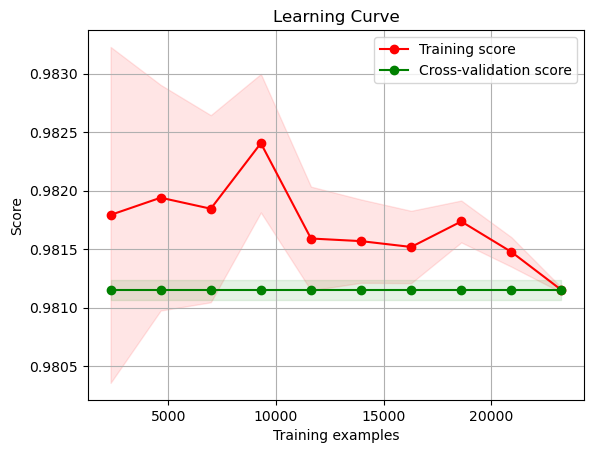

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 假设 stack0 是你的模型，X 是特征，y 是标签
# stack0 = your_model
# X = your_features
# y = your_labels
gnb = GaussianNB(var_smoothing=0.1)
# 用 learning_curve 计算学习曲线数据
train_sizes, train_scores, test_scores = learning_curve(
    stack3_dt_fully_calibrated, X, y, cv=rskf, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10))

# 计算均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 画图
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


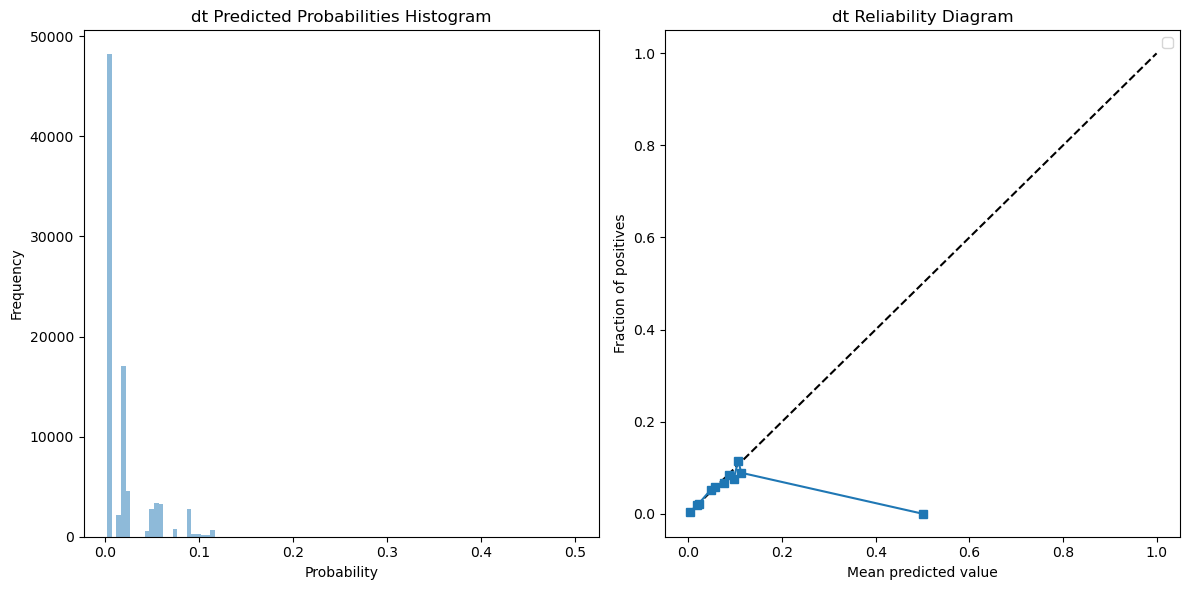

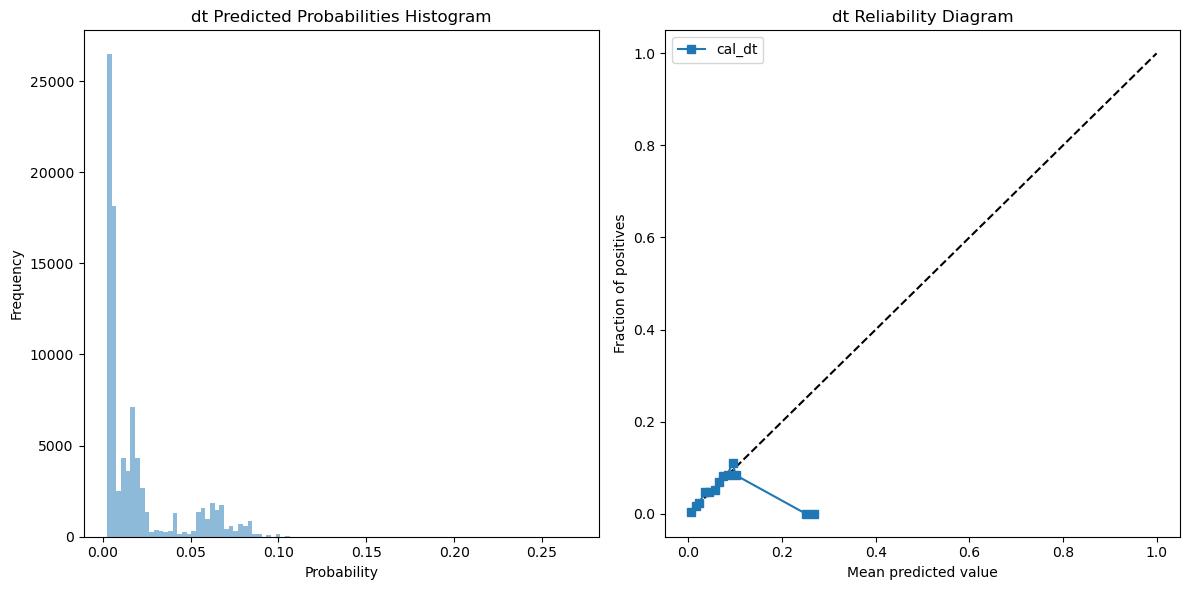

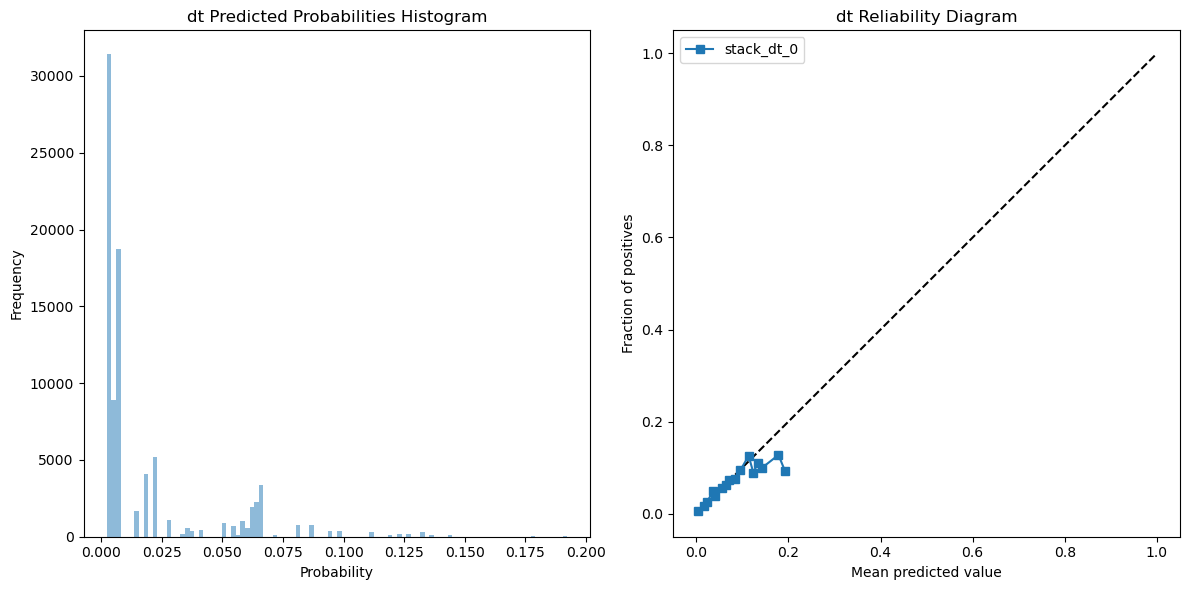

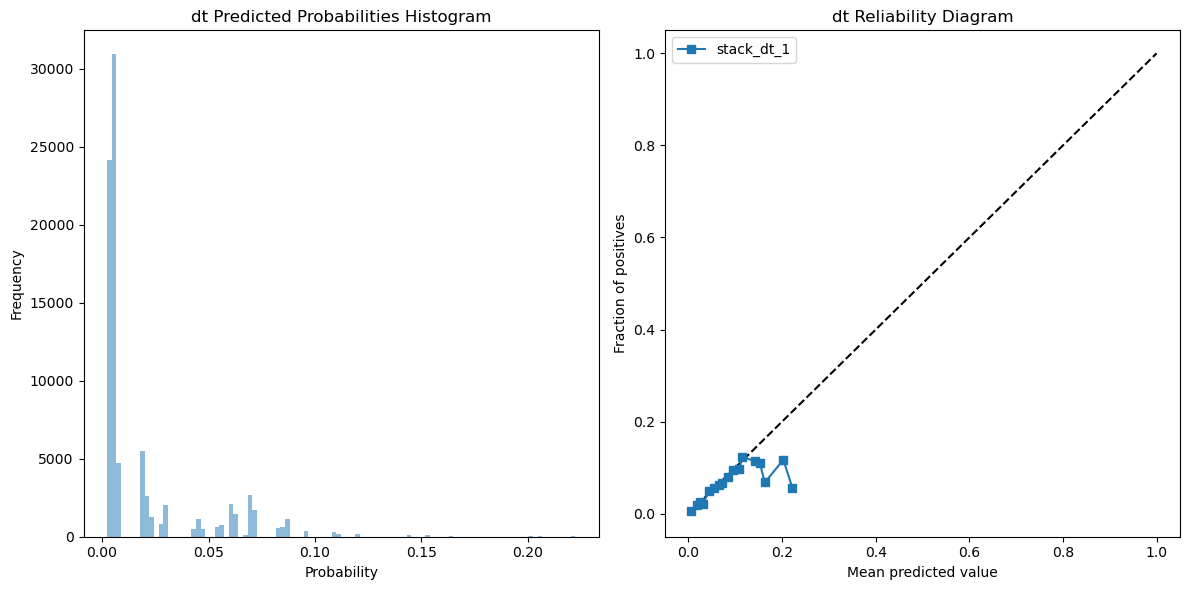

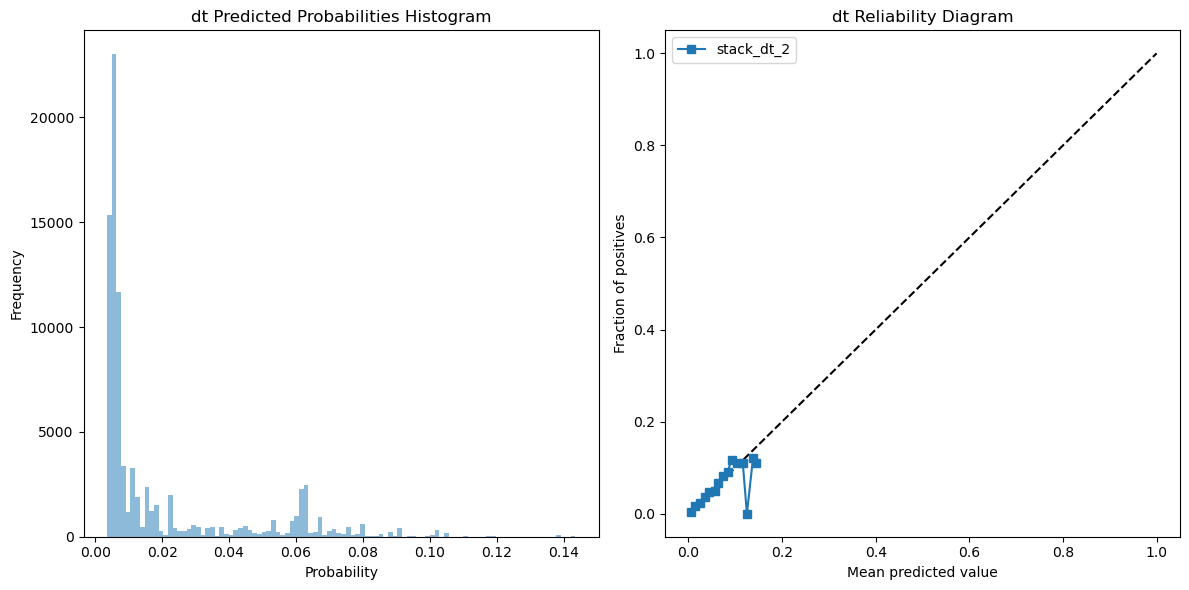

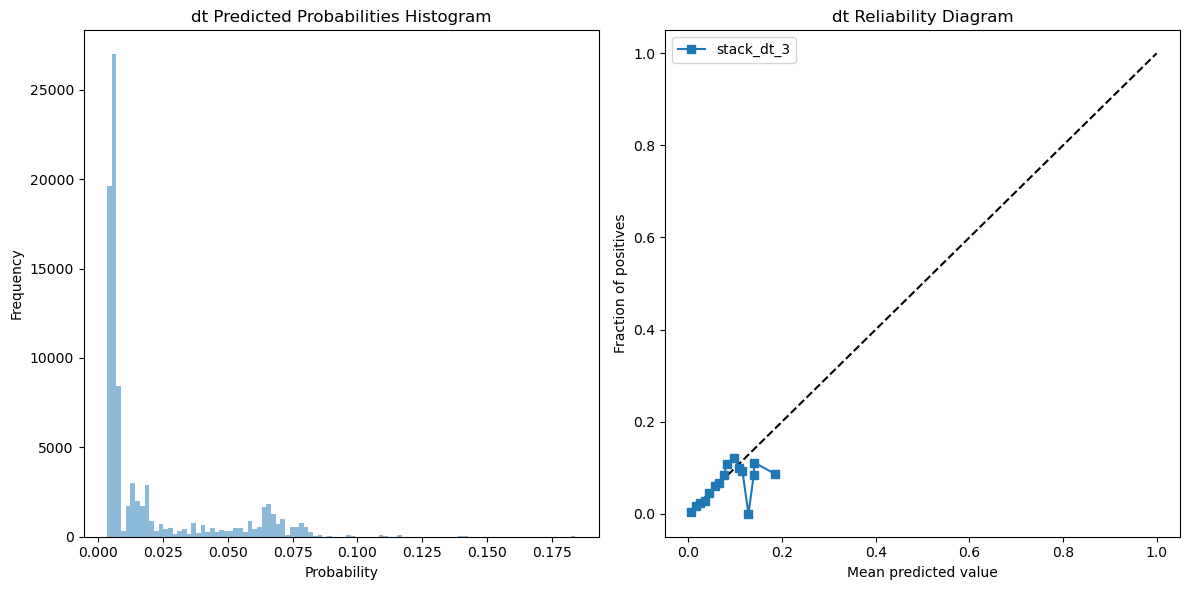

In [35]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 提取预测的概率值（这里我们以正类别为例，您需要根据您的数据适当地选择列）
# 这里假设 probas_qda_dict 中的每个键都对应一个概率数组的列表
# 我们将所有的概率值合并到一个数组中
for key in probas_dt_dict.keys():
    all_probas = np.concatenate(probas_dt_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_dt_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=100, alpha=0.5, label=key)
    plt.title('dt Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=100)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('dt Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [36]:
base_rf = RandomForestClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=5, n_estimators=10, n_jobs=-1)
calibrated_final_estimator_rf = CalibratedClassifierCV(base_rf, method='isotonic', cv=5)

probas_rf_dict = {
    "_rf": [],
    "cal_rf": [],
    "stack_rf_0": [],
    "stack_rf_1": [],
    "stack_rf_2": [],
    "stack_rf_3": []
}

true_rf_labels = []

stack0_rf_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_rf, n_jobs=-1)
stack1_rf_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_rf, n_jobs=-1)
stack2_rf_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_rf, n_jobs=-1)
stack3_rf_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_rf, n_jobs=-1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

results_rf = []

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the rf
    base_rf.fit(X_train, y_train)
    probas_base_rf_test = base_rf.predict_proba(X_test)
    probas_rf_dict["_rf"].append(probas_base_rf_test)

    # Train the cal_rf
    calibrated_final_estimator_rf.fit(X_train, y_train)
    probas_cal_rf_test = calibrated_final_estimator_rf.predict_proba(X_test)
    probas_rf_dict["cal_rf"].append(probas_cal_rf_test)  # Store the predicted probabilities      

    # Train the stack0
    stack0_rf_uncalibrated.fit(X_train, y_train)
    probas_rf_test_stack0 = stack0_rf_uncalibrated.predict_proba(X_test)
    probas_rf_dict["stack_rf_0"].append(probas_rf_test_stack0)


    # Train the stack1
    stack1_rf_partially_calibrated.fit(X_train, y_train)
    probas_rf_test_stack1 = stack1_rf_partially_calibrated.predict_proba(X_test)
    probas_rf_dict["stack_rf_1"].append(probas_rf_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_rf_partially_calibrated.fit(X_train, y_train)
    probas_rf_test_stack2 = stack2_rf_partially_calibrated.predict_proba(X_test)
    probas_rf_dict["stack_rf_2"].append(probas_rf_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_rf_fully_calibrated.fit(X_train, y_train)
    probas_rf_test_stack3 = stack3_rf_fully_calibrated.predict_proba(X_test)
    probas_rf_dict["stack_rf_3"].append(probas_rf_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_rf_labels.extend(y_test.tolist())
    
    # Calculate evaluation metrics for rf
    acc_cal_rf = accuracy_score(y_test, np.argmax(probas_base_rf_test, axis=1))
    brier_cal_rf = brier_score(y_true_indicator, probas_base_rf_test)
    ece_cal_rf = ECE(y_true=y_true_indicator, probs=probas_base_rf_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_rf = MCE(y_true=y_test.values.tolist(), probs=probas_base_rf_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_rf = cross_entropy(y_true_indicator, probas_base_rf_test)
    roc_auc_cal_rf = roc_auc_score(y_test, probas_base_rf_test[:, 1])
    
    # Calculate evaluation metrics for cal_rf
    
    acc_cal_cal_rf = accuracy_score(y_test, np.argmax(probas_cal_rf_test, axis=1))
    brier_cal_cal_rf = brier_score(y_true_indicator, probas_cal_rf_test)
    ece_cal_cal_rf = ECE(y_true=y_true_indicator, probs=probas_cal_rf_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_rf = MCE(y_true=y_test.values.tolist(), probs=probas_cal_rf_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_rf = cross_entropy(y_true_indicator, probas_cal_rf_test)
    roc_auc_cal_cal_rf = roc_auc_score(y_test, probas_cal_rf_test[:, 1])

    # Calculate evaluation metrics for stack0
    acc_cal_rf_stack0 = accuracy_score(y_test, np.argmax(probas_rf_test_stack0, axis=1))
    brier_cal_rf_stack0 = brier_score(y_true_indicator, probas_rf_test_stack0)
    ece_cal_rf_stack0 = ECE(y_true=y_true_indicator, probs=probas_rf_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_rf_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_rf_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_rf_stack0 = cross_entropy(y_true_indicator, probas_rf_test_stack0)
    roc_auc_cal_rf_stack0 = roc_auc_score(y_test, probas_rf_test_stack0[:, 1])

    
    # Calculate evaluation metrics for stack1
    acc_cal_rf_stack1 = accuracy_score(y_test, np.argmax(probas_rf_test_stack1, axis=1))
    brier_cal_rf_stack1 = brier_score(y_true_indicator, probas_rf_test_stack1)
    ece_cal_rf_stack1 = ECE(y_true=y_true_indicator, probs=probas_rf_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_rf_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_rf_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_rf_stack1 = cross_entropy(y_true_indicator, probas_rf_test_stack1)
    roc_auc_cal_rf_stack1 = roc_auc_score(y_test, probas_rf_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_rf_stack2 = accuracy_score(y_test, np.argmax(probas_rf_test_stack2, axis=1))
    brier_cal_rf_stack2 = brier_score(y_true_indicator, probas_rf_test_stack2)
    ece_cal_rf_stack2 = ECE(y_true=y_true_indicator, probs=probas_rf_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_rf_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_rf_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_rf_stack2 = cross_entropy(y_true_indicator, probas_rf_test_stack2)
    roc_auc_cal_rf_stack2 = roc_auc_score(y_test, probas_rf_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_rf_stack3 = accuracy_score(y_test, np.argmax(probas_rf_test_stack3, axis=1))
    brier_cal_rf_stack3 = brier_score(y_true_indicator, probas_rf_test_stack3)
    ece_cal_rf_stack3 = ECE(y_true=y_true_indicator, probs=probas_rf_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_rf_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_rf_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_rf_stack3 = cross_entropy(y_true_indicator, probas_rf_test_stack3)
    roc_auc_cal_rf_stack3 = roc_auc_score(y_test, probas_rf_test_stack3[:, 1])

    results_rf.append({    
        'Brier Score (base_rf)': brier_cal_rf,
        'ECE (base_rf)': ece_cal_rf,
        'MCE (base_rf)': mce_cal_rf,
        'Cross-Entropy (base_rf)': ce_cal_rf,
        'Accuracy (base_rf)': acc_cal_rf,
        'ROC AUC (base_rf)': roc_auc_cal_rf,
        
        'Brier Score (cal_rf)': brier_cal_cal_rf,
        'ECE (cal_rf)': ece_cal_cal_rf,
        'MCE (cal_rf)': mce_cal_cal_rf,
        'Cross-Entropy (cal_rf)': ce_cal_cal_rf,
        'Accuracy (cal_rf)': acc_cal_cal_rf,
        'ROC AUC (cal_rf)': roc_auc_cal_cal_rf,
        
        'Brier Score (stack0_rf_partially_calibrated)': brier_cal_rf_stack0,
        'ECE (stack0_rf_partially_calibrated)': ece_cal_rf_stack0,
        'MCE (stack0_rf_partially_calibrated)': mce_cal_rf_stack0,
        'Cross-Entropy (stack0_rf_partially_calibrated)': ce_cal_rf_stack0,
        'Accuracy (stack0_rf_partially_calibrated)': acc_cal_rf_stack0,
        'ROC AUC (stack0_rf_partially_calibrated)': roc_auc_cal_rf_stack0,
        
        'Brier Score (stack1_rf_partially_calibrated)': brier_cal_rf_stack1,
        'ECE (stack1_rf_partially_calibrated)': ece_cal_rf_stack1,
        'MCE (stack1_rf_partially_calibrated)': mce_cal_rf_stack1,
        'Cross-Entropy (stack1_rf_partially_calibrated)': ce_cal_rf_stack1,
        'Accuracy (stack1_rf_partially_calibrated)': acc_cal_rf_stack1,
        'ROC AUC (stack1_rf_partially_calibrated)': roc_auc_cal_rf_stack1,

        'Brier Score (stack2_rf_partially_calibrated)': brier_cal_rf_stack2,
        'ECE (stack2_rf_partially_calibrated)': ece_cal_rf_stack2,
        'MCE (stack2_rf_partially_calibrated)': mce_cal_rf_stack2,
        'Cross-Entropy (stack2_rf_partially_calibrated)': ce_cal_rf_stack2,
        'Accuracy (stack2_rf_partially_calibrated)': acc_cal_rf_stack2,
        'ROC AUC (stack2_rf_partially_calibrated)': roc_auc_cal_rf_stack2,

        'Brier Score (stack3_rf_fully_calibrated)': brier_cal_rf_stack3,
        'ECE (stack3_rf_fully_calibrated)': ece_cal_rf_stack3,
        'MCE (stack3_rf_fully_calibrated)': mce_cal_rf_stack3,
        'Cross-Entropy (stack3_rf_fully_calibrated)': ce_cal_rf_stack3,
        'Accuracy (stack3_rf_fully_calibrated)': acc_cal_rf_stack3,
        'ROC AUC (stack3_rf_fully_calibrated)': roc_auc_cal_rf_stack3,
    })

# Display results
results_rf_df = pd.DataFrame(results_rf)
print("Results for each fold:")
print(results_rf_df)

# Calculate and display the average
avg_results_rf = results_rf_df.mean()
print("\nAverage results:")
print(avg_results_rf)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Results for each fold:
    Brier Score (base_rf)  ECE (base_rf)  MCE (base_rf)  \
0                0.018000       0.241940       0.043053   
1                0.018067       0.240820       0.174720   
2                0.017871       0.242695       0.033641   
3                0.018024       0.240626       0.022882   
4                0.018063       0.241378       0.037144   
5                0.018028       0.240841       0.023962   
6                0.017905       0.241526       0.046578   
7                0.017886       0.242723       0.002066   
8                0.017852       0.241295       0.054117   
9                0.017998       0.241568       0.060986   
10               0.017980       0.240703       0.011198   
11               0.018201       0.240584       0.053108   
12               0.017713       0.241991       0.056647   
13               0.017975       0.240626       0.019478   
14               0.018125       0.241906       0.007915   

    Cross-Entropy (base_rf)  Acc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


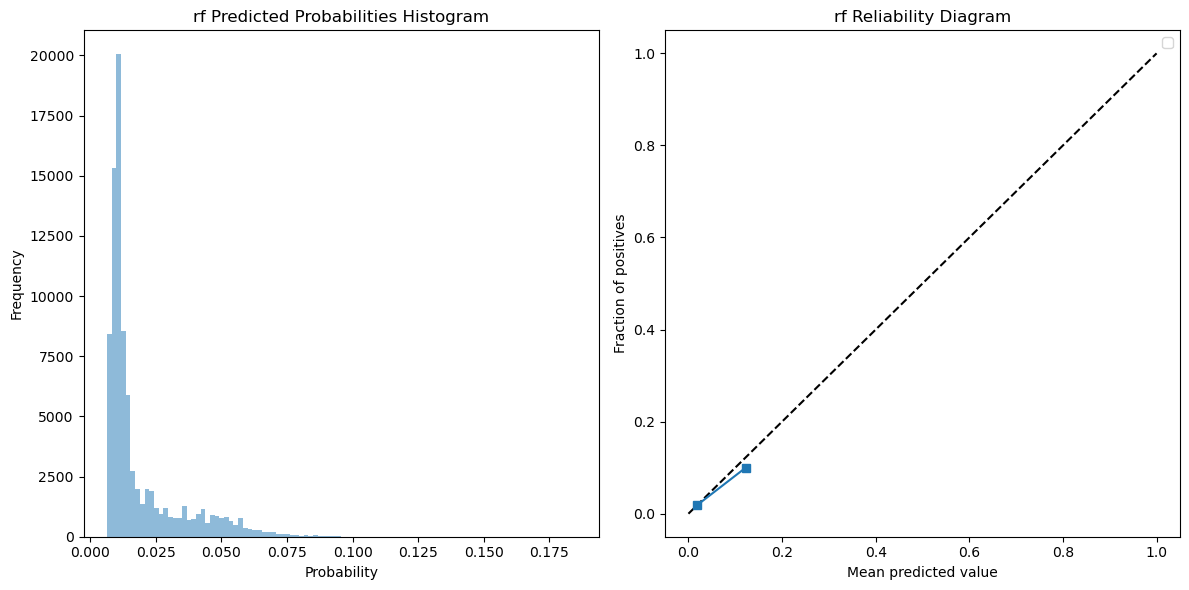

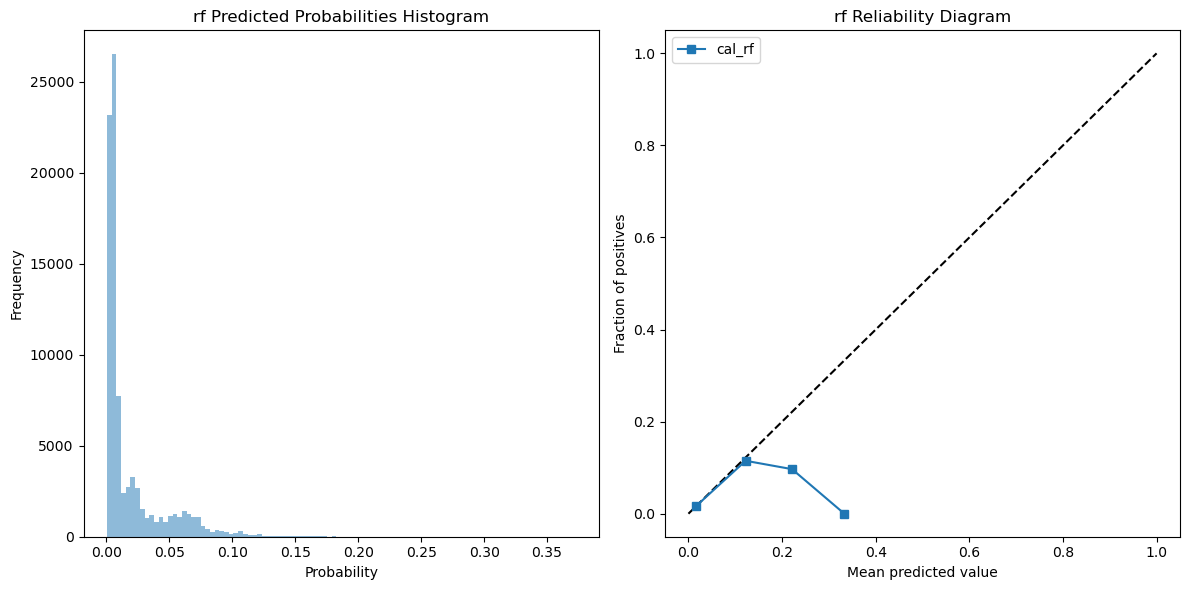

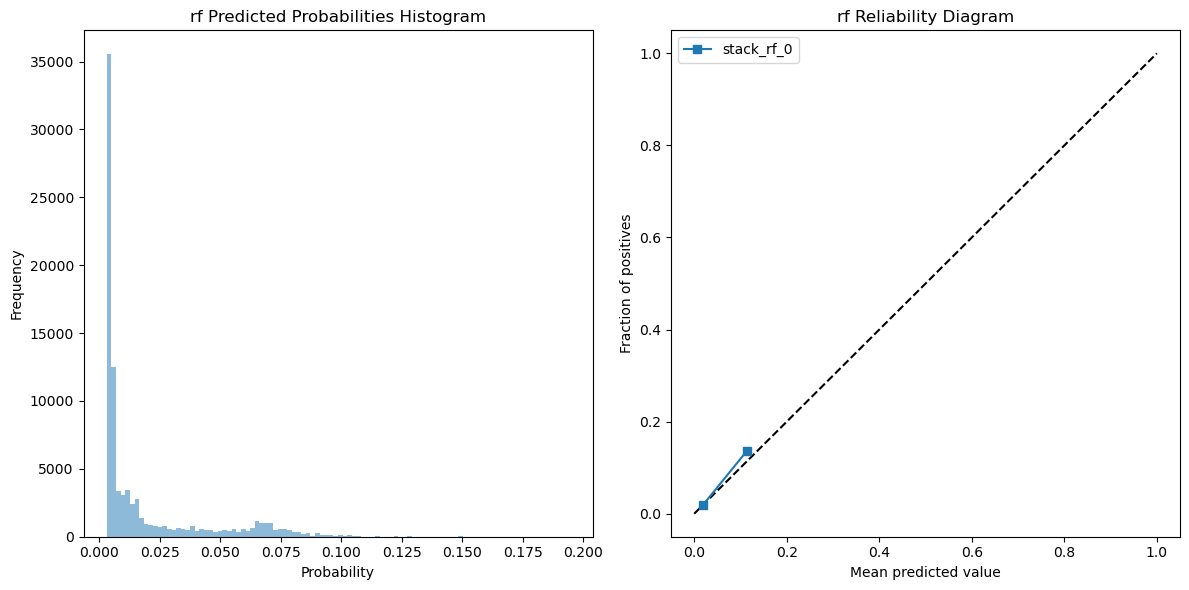

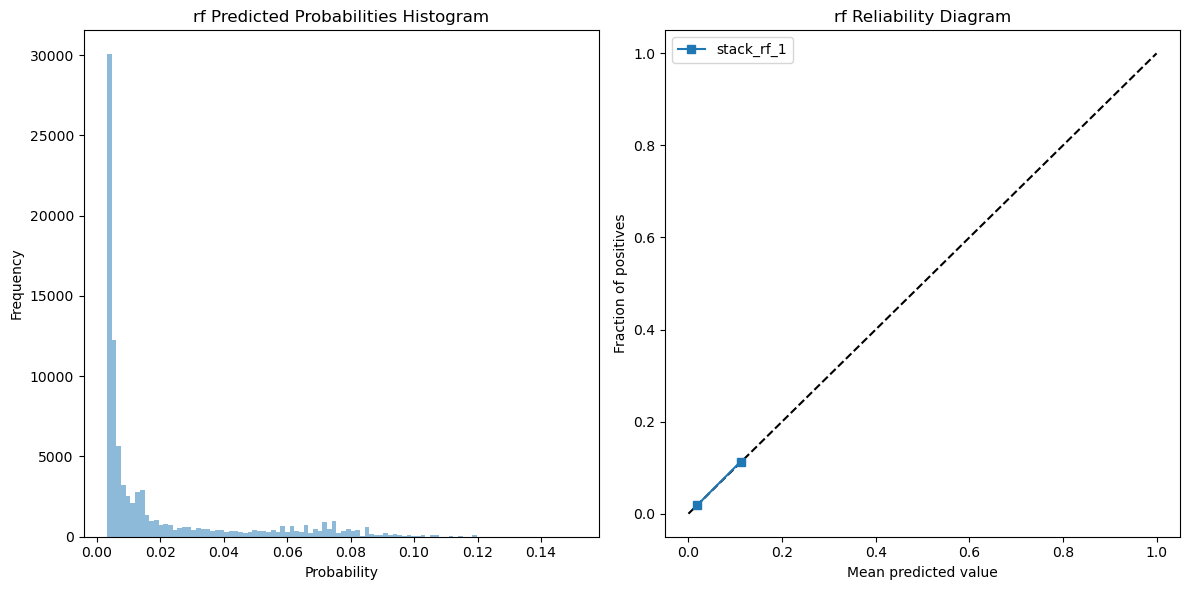

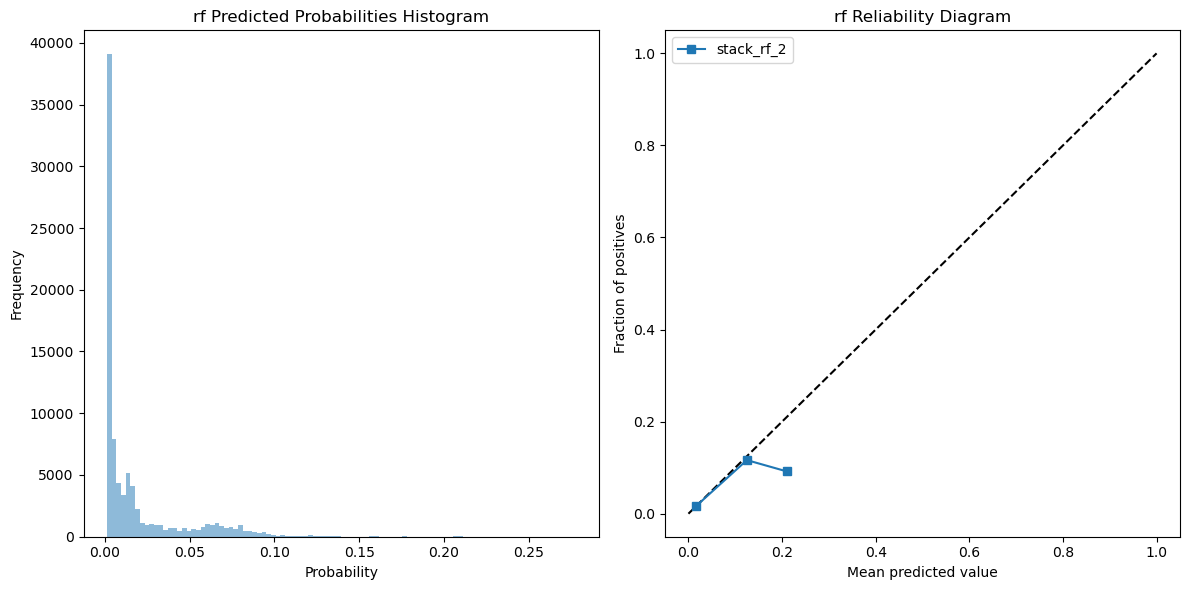

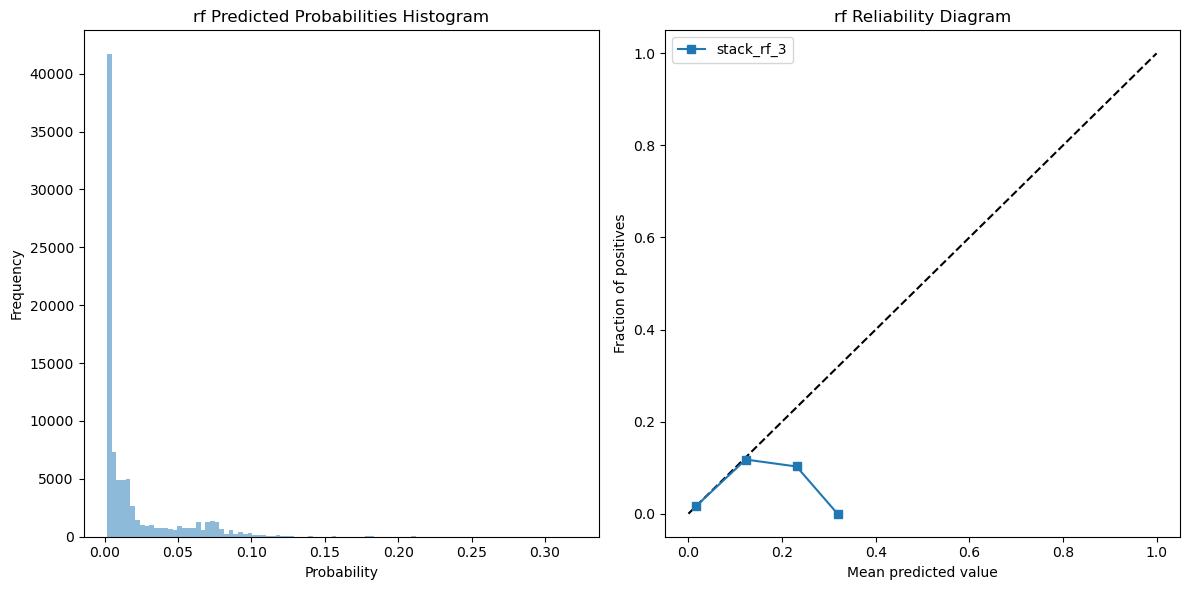

In [37]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 提取预测的概率值（这里我们以正类别为例，您需要根据您的数据适当地选择列）
# 这里假设 probas_qda_dict 中的每个键都对应一个概率数组的列表
# 我们将所有的概率值合并到一个数组中
for key in probas_rf_dict.keys():
    all_probas = np.concatenate(probas_rf_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_rf_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=100, alpha=0.5, label=key)
    plt.title('rf Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('rf Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [38]:
base_knn = KNeighborsClassifier(leaf_size=20, n_neighbors=200, weights= 'uniform', n_jobs=-1)
calibrated_final_estimator_knn = CalibratedClassifierCV(base_knn, method='isotonic', cv=5)
probas_knn_dict = {
    "_knn": [],
    "cal_knn": [],
    "stack_knn_0": [],
    "stack_knn_1": [],
    "stack_knn_2": [],
    "stack_knn_3": []
}

true_knn_labels = []

stack0_knn_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_knn, n_jobs=-1)
stack1_knn_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_knn, n_jobs=-1)
stack2_knn_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_knn, n_jobs=-1)
stack3_knn_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_knn, n_jobs=-1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

results_knn = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the knn
    base_knn.fit(X_train, y_train)
    probas_base_knn_test = base_knn.predict_proba(X_test)
    probas_knn_dict["_knn"].append(probas_base_knn_test)  # Store the predicted probabilities

    # Train the cal_knn
    calibrated_final_estimator_knn.fit(X_train, y_train)
    probas_cal_knn_test = calibrated_final_estimator_knn.predict_proba(X_test)
    probas_knn_dict["cal_knn"].append(probas_cal_knn_test)  # Store the predicted probabilities      
    
    # Train the stack0
    stack0_knn_uncalibrated.fit(X_train, y_train)
    probas_knn_test_stack0 = stack0_knn_uncalibrated.predict_proba(X_test)
    probas_knn_dict["stack_knn_0"].append(probas_knn_test_stack0)  # Store the predicted probabilities    

    # Train the stack1
    stack1_knn_partially_calibrated.fit(X_train, y_train)
    probas_knn_test_stack1 = stack1_knn_partially_calibrated.predict_proba(X_test)
    probas_knn_dict["stack_knn_1"].append(probas_knn_test_stack1)  # Store the predicted probabilities
    
    # Train the stack2
    stack2_knn_partially_calibrated.fit(X_train, y_train)
    probas_knn_test_stack2 = stack2_knn_partially_calibrated.predict_proba(X_test)
    probas_knn_dict["stack_knn_2"].append(probas_knn_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_knn_fully_calibrated.fit(X_train, y_train)
    probas_knn_test_stack3 = stack3_knn_fully_calibrated.predict_proba(X_test)
    probas_knn_dict["stack_knn_3"].append(probas_knn_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_knn_labels.extend(y_test.tolist())
    
    # Calculate evaluation metrics for knn
    acc_cal_knn = accuracy_score(y_test, np.argmax(probas_base_knn_test, axis=1))
    brier_cal_knn = brier_score(y_true_indicator, probas_base_knn_test)
    ece_cal_knn = ECE(y_true=y_true_indicator, probs=probas_base_knn_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_knn = MCE(y_true=y_test.values.tolist(), probs=probas_base_knn_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_knn = cross_entropy(y_true_indicator, probas_base_knn_test)
    roc_auc_cal_knn = roc_auc_score(y_test, probas_base_knn_test[:, 1])    

    # Calculate evaluation metrics for cal_knn
    
    acc_cal_cal_knn = accuracy_score(y_test, np.argmax(probas_cal_knn_test, axis=1))
    brier_cal_cal_knn = brier_score(y_true_indicator, probas_cal_knn_test)
    ece_cal_cal_knn = ECE(y_true=y_true_indicator, probs=probas_cal_knn_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_knn = MCE(y_true=y_test.values.tolist(), probs=probas_cal_knn_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_knn = cross_entropy(y_true_indicator, probas_cal_knn_test)
    roc_auc_cal_cal_knn = roc_auc_score(y_test, probas_cal_knn_test[:, 1])
    
    # Calculate evaluation metrics for stack0
    acc_cal_knn_stack0 = accuracy_score(y_test, np.argmax(probas_knn_test_stack0, axis=1))
    brier_cal_knn_stack0 = brier_score(y_true_indicator, probas_knn_test_stack0)
    ece_cal_knn_stack0 = ECE(y_true=y_true_indicator, probs=probas_knn_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_knn_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_knn_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_knn_stack0 = cross_entropy(y_true_indicator, probas_knn_test_stack0)
    roc_auc_cal_knn_stack0 = roc_auc_score(y_test, probas_knn_test_stack0[:, 1])

    
    
    # Calculate evaluation metrics for stack1
    acc_cal_knn_stack1 = accuracy_score(y_test, np.argmax(probas_knn_test_stack1, axis=1))
    brier_cal_knn_stack1 = brier_score(y_true_indicator, probas_knn_test_stack1)
    ece_cal_knn_stack1 = ECE(y_true=y_true_indicator, probs=probas_knn_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_knn_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_knn_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_knn_stack1 = cross_entropy(y_true_indicator, probas_knn_test_stack1)
    roc_auc_cal_knn_stack1 = roc_auc_score(y_test, probas_knn_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_knn_stack2 = accuracy_score(y_test, np.argmax(probas_knn_test_stack2, axis=1))
    brier_cal_knn_stack2 = brier_score(y_true_indicator, probas_knn_test_stack2)
    ece_cal_knn_stack2 = ECE(y_true=y_true_indicator, probs=probas_knn_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_knn_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_knn_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_knn_stack2 = cross_entropy(y_true_indicator, probas_knn_test_stack2)
    roc_auc_cal_knn_stack2 = roc_auc_score(y_test, probas_knn_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_knn_stack3 = accuracy_score(y_test, np.argmax(probas_knn_test_stack3, axis=1))
    brier_cal_knn_stack3 = brier_score(y_true_indicator, probas_knn_test_stack3)
    ece_cal_knn_stack3 = ECE(y_true=y_true_indicator, probs=probas_knn_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_knn_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_knn_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_knn_stack3 = cross_entropy(y_true_indicator, probas_knn_test_stack3)
    roc_auc_cal_knn_stack3 = roc_auc_score(y_test, probas_knn_test_stack3[:, 1])
    
    
    
    results_knn.append({
        'Brier Score (base_knn)': brier_cal_knn,
        'ECE (base_knn)': ece_cal_knn,
        'MCE (base_knn)': mce_cal_knn,
        'Cross-Entropy (base_knn)': ce_cal_knn,
        'Accuracy (base_knn)': acc_cal_knn,
        'ROC AUC (base_knn)': roc_auc_cal_knn,

        'Brier Score (cal_knn)': brier_cal_cal_knn,
        'ECE (cal_knn)': ece_cal_cal_knn,
        'MCE (cal_knn)': mce_cal_cal_knn,
        'Cross-Entropy (cal_knn)': ce_cal_cal_knn,
        'Accuracy (cal_knn)': acc_cal_cal_knn,
        'ROC AUC (cal_knn)': roc_auc_cal_cal_knn,
        
        'Brier Score (stack0_knn_partially_calibrated)': brier_cal_knn_stack0,
        'ECE (stack0_knn_partially_calibrated)': ece_cal_knn_stack0,
        'MCE (stack0_knn_partially_calibrated)': mce_cal_knn_stack0,
        'Cross-Entropy (stack0_knn_partially_calibrated)': ce_cal_knn_stack0,
        'Accuracy (stack0_knn_partially_calibrated)': acc_cal_knn_stack0,
        'ROC AUC (stack0_knn_partially_calibrated)': roc_auc_cal_knn_stack0,
        
        
        'Brier Score (stack1_knn_partially_calibrated)': brier_cal_knn_stack1,
        'ECE (stack1_knn_partially_calibrated)': ece_cal_knn_stack1,
        'MCE (stack1_knn_partially_calibrated)': mce_cal_knn_stack1,
        'Cross-Entropy (stack1_knn_partially_calibrated)': ce_cal_knn_stack1,
        'Accuracy (stack1_knn_partially_calibrated)': acc_cal_knn_stack1,
        'ROC AUC (stack1_knn_partially_calibrated)': roc_auc_cal_knn_stack1,

        'Brier Score (stack2_knn_partially_calibrated)': brier_cal_knn_stack2,
        'ECE (stack2_knn_partially_calibrated)': ece_cal_knn_stack2,
        'MCE (stack2_knn_partially_calibrated)': mce_cal_knn_stack2,
        'Cross-Entropy (stack2_knn_partially_calibrated)': ce_cal_knn_stack2,
        'Accuracy (stack2_knn_partially_calibrated)': acc_cal_knn_stack2,
        'ROC AUC (stack2_knn_partially_calibrated)': roc_auc_cal_knn_stack2,

        'Brier Score (stack3_knn_fully_calibrated)': brier_cal_knn_stack3,
        'ECE (stack3_knn_fully_calibrated)': ece_cal_knn_stack3,
        'MCE (stack3_knn_fully_calibrated)': mce_cal_knn_stack3,
        'Cross-Entropy (stack3_knn_fully_calibrated)': ce_cal_knn_stack3,
        'Accuracy (stack3_knn_fully_calibrated)': acc_cal_knn_stack3,
        'ROC AUC (stack3_knn_fully_calibrated)': roc_auc_cal_knn_stack3,
    })

# Display results
results_knn_df = pd.DataFrame(results_knn)
print("Results for each fold:")
print(results_knn_df)

# Calculate and display the average
avg_results_knn = results_knn_df.mean()
print("\nAverage results:")
print(avg_results_knn)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Results for each fold:
    Brier Score (base_knn)  ECE (base_knn)  MCE (base_knn)  \
0                 0.018064        0.244393        0.016332   
1                 0.018076        0.243402        0.004620   
2                 0.017716        0.244647        0.000720   
3                 0.018030        0.242026        0.135000   
4                 0.017924        0.243499        0.009360   
5                 0.017966        0.242685        0.135000   
6                 0.017869        0.243564        0.019685   
7                 0.017940        0.244927        0.014979   
8                 0.017906        0.243350        0.007098   
9                 0.018047        0.243842        0.002840   
10                0.017969        0.242466        0.000652   
11                0.017985        0.242992        0.000255   
12                0.017851        0.244235        0.008602   
13                0.017822        0.242704        0.004043   
14                0.018209        0.244221     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


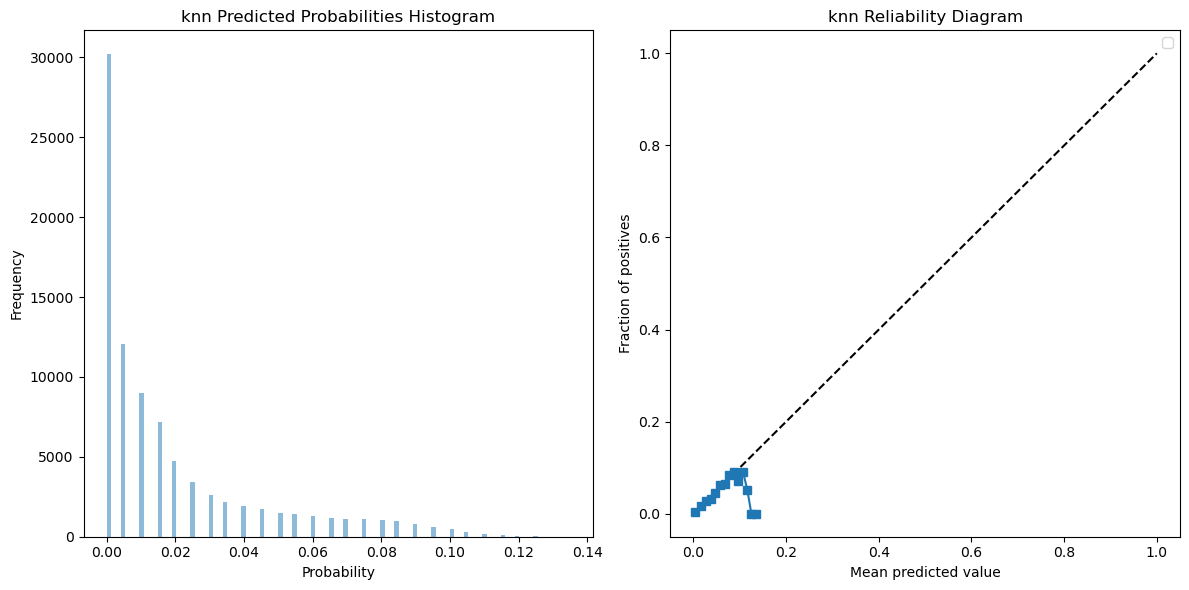

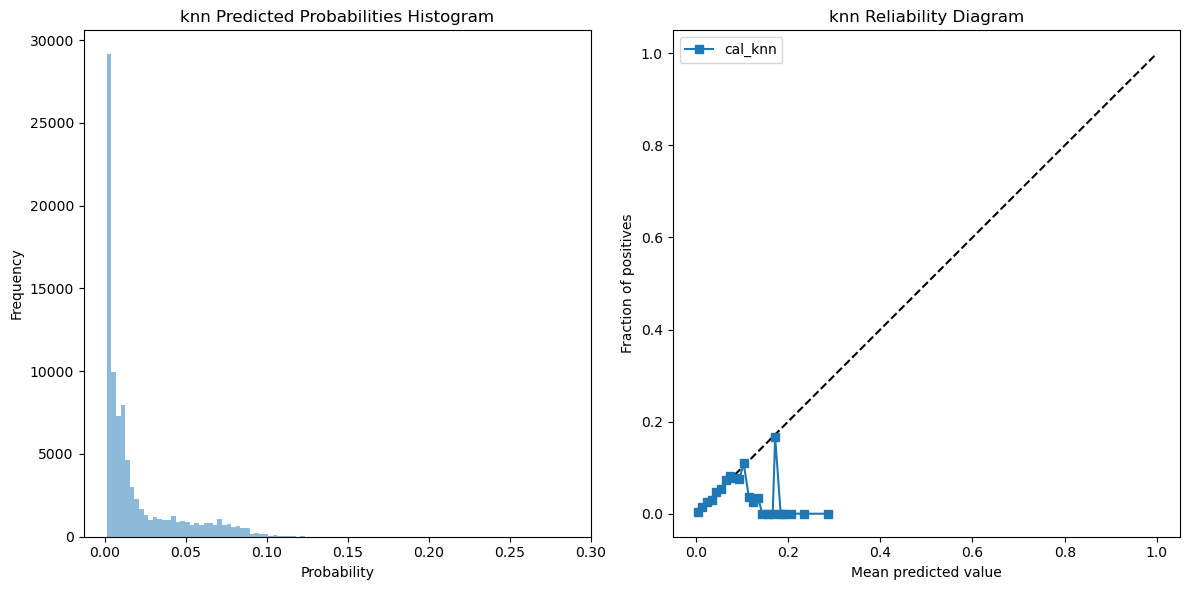

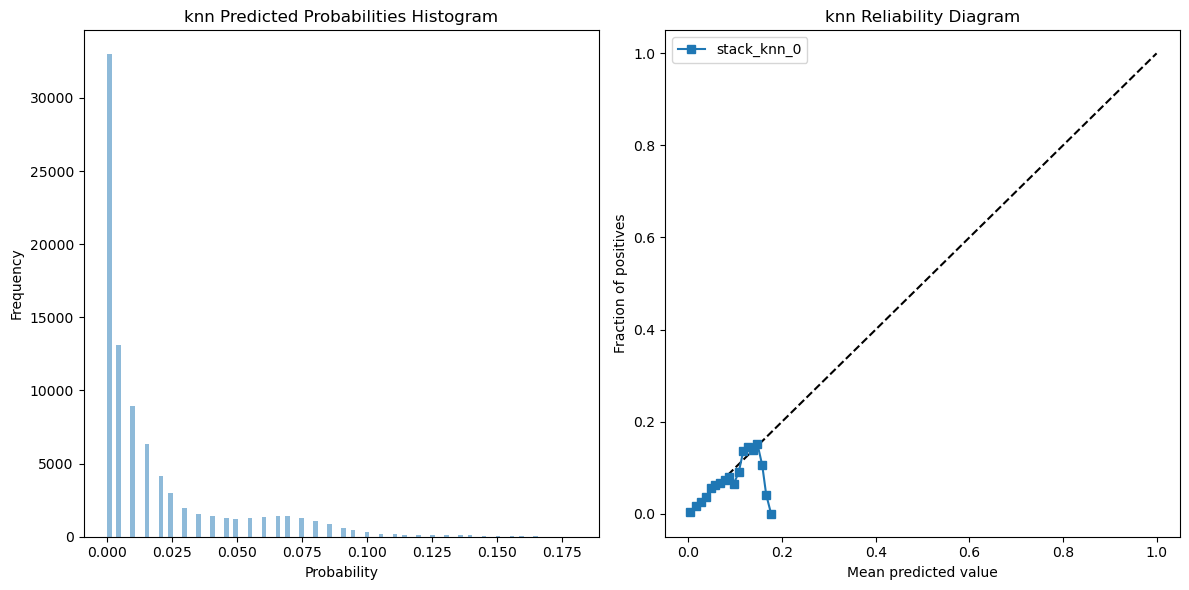

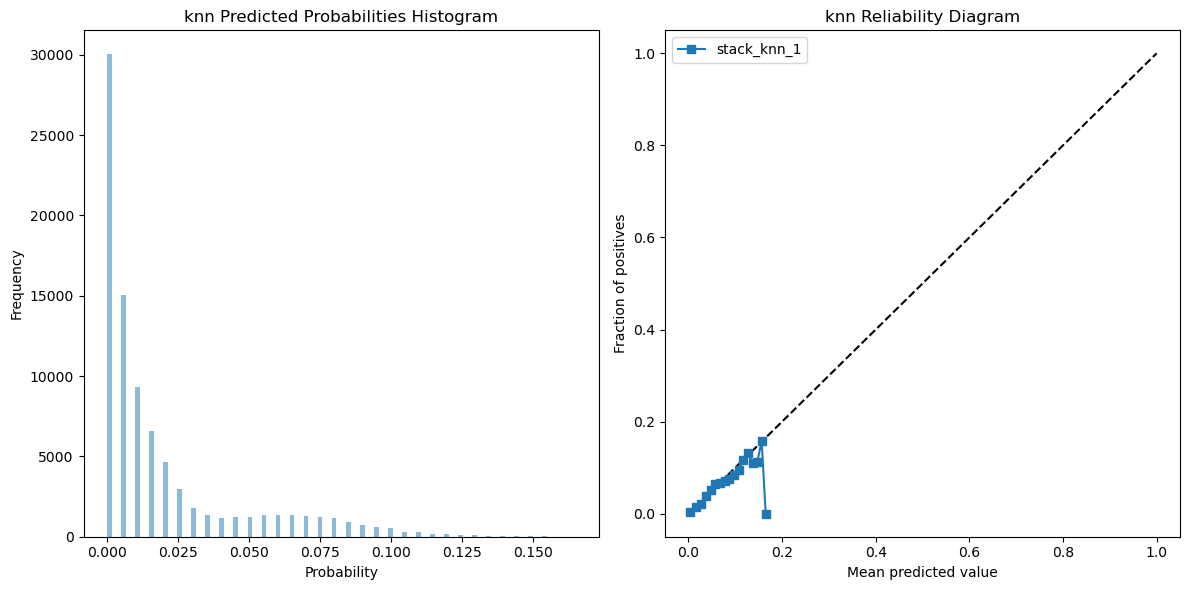

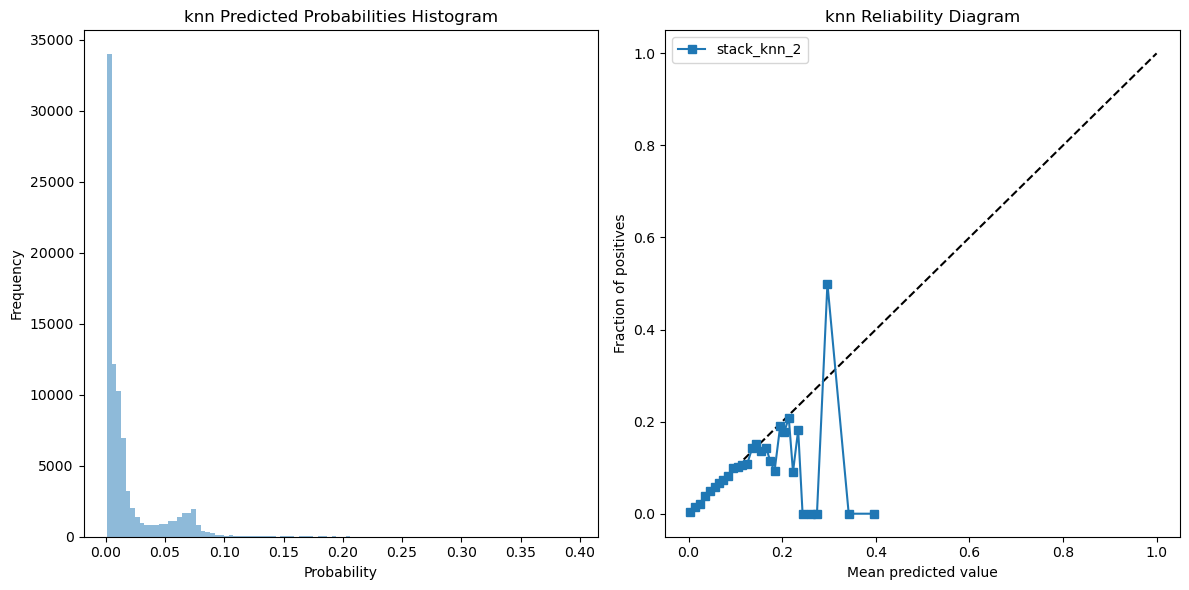

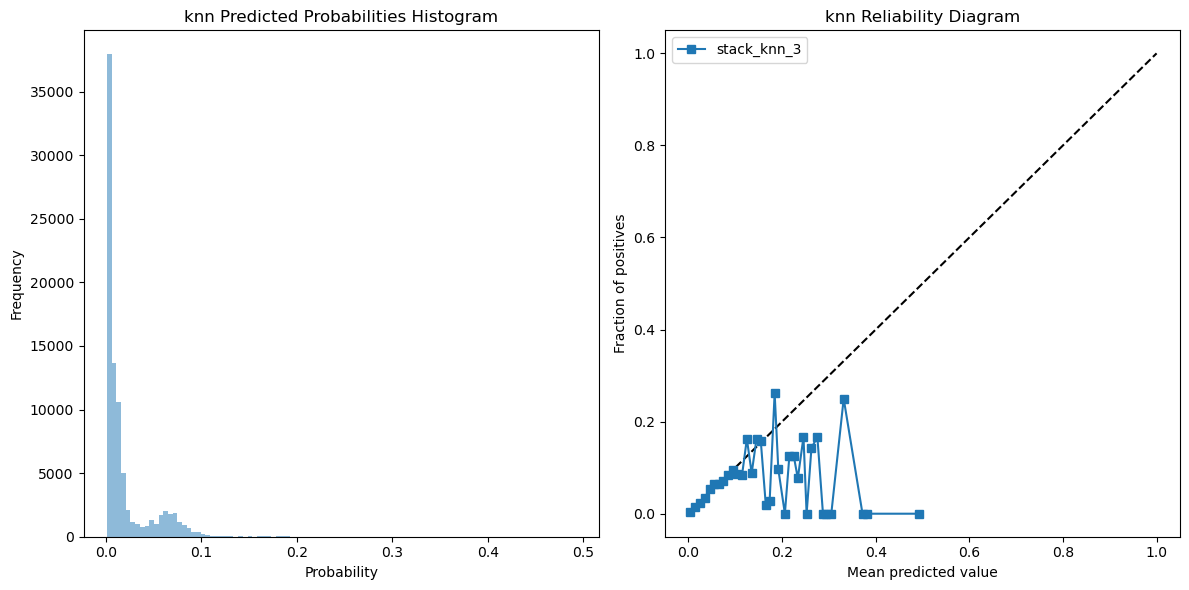

In [39]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 提取预测的概率值（这里我们以正类别为例，您需要根据您的数据适当地选择列）
# 这里假设 probas_qda_dict 中的每个键都对应一个概率数组的列表
# 我们将所有的概率值合并到一个数组中
for key in probas_knn_dict.keys():
    all_probas = np.concatenate(probas_knn_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_knn_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=100, alpha=0.5, label=key)
    plt.title('knn Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=100)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('knn Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()

In [40]:
base_NB = GaussianNB(var_smoothing=1e-09)
calibrated_final_estimator_NB = CalibratedClassifierCV(base_NB, method='isotonic', cv=5)
probas_NB_dict = {
    "_NB": [],
    "cal_NB": [],
    "stack_NB_0": [],
    "stack_NB_1": [],
    "stack_NB_2": [],
    "stack_NB_3": []
}

true_NB_labels = []

stack0_NB_uncalibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=base_NB, n_jobs=-1)
stack1_NB_partially_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=base_NB, n_jobs=-1)
stack2_NB_partially_calibrated = StackingClassifier(estimators=raw_base_learners_new, final_estimator=calibrated_final_estimator_NB, n_jobs=-1)
stack3_NB_fully_calibrated = StackingClassifier(estimators=calibrated_learners, final_estimator=calibrated_final_estimator_NB, n_jobs=-1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

results_NB = []

for train_index, test_index in rskf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the NB
    base_NB.fit(X_train, y_train)
    probas_base_NB_test = base_NB.predict_proba(X_test)
    probas_NB_dict["_NB"].append(probas_base_NB_test)  # Store the predicted probabilities

    # Train the cal_NB
    calibrated_final_estimator_NB.fit(X_train, y_train)
    probas_cal_NB_test = calibrated_final_estimator_NB.predict_proba(X_test)
    probas_NB_dict["cal_NB"].append(probas_cal_NB_test)  # Store the predicted probabilities      
    
    # Train the stack0
    stack0_NB_uncalibrated.fit(X_train, y_train)
    probas_NB_test_stack0 = stack0_NB_uncalibrated.predict_proba(X_test)
    probas_NB_dict["stack_NB_0"].append(probas_NB_test_stack0)  # Store the predicted probabilities    
    # Train the stack1
    stack1_NB_partially_calibrated.fit(X_train, y_train)
    probas_NB_test_stack1 = stack1_NB_partially_calibrated.predict_proba(X_test)
    probas_NB_dict["stack_NB_1"].append(probas_NB_test_stack1)  # Store the predicted probabilities

    
    # Train the stack2
    stack2_NB_partially_calibrated.fit(X_train, y_train)
    probas_NB_test_stack2 = stack2_NB_partially_calibrated.predict_proba(X_test)
    probas_NB_dict["stack_NB_2"].append(probas_NB_test_stack2)  # Store the predicted probabilities
    
    # Train the stack3
    stack3_NB_fully_calibrated.fit(X_train, y_train)
    probas_NB_test_stack3 = stack3_NB_fully_calibrated.predict_proba(X_test)
    probas_NB_dict["stack_NB_3"].append(probas_NB_test_stack3)  # Store the predicted probabilities
    
    # Convert y_test to indicator matrix
    y_true_indicator = convert_to_indicator(y_test)

    true_NB_labels.extend(y_test.tolist())

    # Calculate evaluation metrics for NB
    acc_cal_NB = accuracy_score(y_test, np.argmax(probas_base_NB_test, axis=1))
    brier_cal_NB = brier_score(y_true_indicator, probas_base_NB_test)
    ece_cal_NB = ECE(y_true=y_true_indicator, probs=probas_base_NB_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_NB = MCE(y_true=y_test.values.tolist(), probs=probas_base_NB_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_NB = cross_entropy(y_true_indicator, probas_base_NB_test)
    roc_auc_cal_NB = roc_auc_score(y_test, probas_base_NB_test[:, 1])    

    # Calculate evaluation metrics for cal_NB
    
    acc_cal_cal_NB = accuracy_score(y_test, np.argmax(probas_cal_NB_test, axis=1))
    brier_cal_cal_NB = brier_score(y_true_indicator, probas_cal_NB_test)
    ece_cal_cal_NB = ECE(y_true=y_true_indicator, probs=probas_cal_NB_test.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_cal_NB = MCE(y_true=y_test.values.tolist(), probs=probas_cal_NB_test.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_cal_NB = cross_entropy(y_true_indicator, probas_cal_NB_test)
    roc_auc_cal_cal_NB = roc_auc_score(y_test, probas_cal_NB_test[:, 1])    

    # Calculate evaluation metrics for stack0
    acc_cal_NB_stack0 = accuracy_score(y_test, np.argmax(probas_NB_test_stack0, axis=1))
    brier_cal_NB_stack0 = brier_score(y_true_indicator, probas_NB_test_stack0)
    ece_cal_NB_stack0 = ECE(y_true=y_true_indicator, probs=probas_NB_test_stack0.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_NB_stack0 = MCE(y_true=y_test.values.tolist(), probs=probas_NB_test_stack0.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_NB_stack0 = cross_entropy(y_true_indicator, probas_NB_test_stack0)
    roc_auc_cal_NB_stack0 = roc_auc_score(y_test, probas_NB_test_stack0[:, 1])


    
    # Calculate evaluation metrics for stack1
    acc_cal_NB_stack1 = accuracy_score(y_test, np.argmax(probas_NB_test_stack1, axis=1))
    brier_cal_NB_stack1 = brier_score(y_true_indicator, probas_NB_test_stack1)
    ece_cal_NB_stack1 = ECE(y_true=y_true_indicator, probs=probas_NB_test_stack1.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_NB_stack1 = MCE(y_true=y_test.values.tolist(), probs=probas_NB_test_stack1.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_NB_stack1 = cross_entropy(y_true_indicator, probas_NB_test_stack1)
    roc_auc_cal_NB_stack1 = roc_auc_score(y_test, probas_NB_test_stack1[:, 1])

    # Calculate evaluation metrics for stack2
    acc_cal_NB_stack2 = accuracy_score(y_test, np.argmax(probas_NB_test_stack2, axis=1))
    brier_cal_NB_stack2 = brier_score(y_true_indicator, probas_NB_test_stack2)
    ece_cal_NB_stack2 = ECE(y_true=y_true_indicator, probs=probas_NB_test_stack2.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_NB_stack2 = MCE(y_true=y_test.values.tolist(), probs=probas_NB_test_stack2.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_NB_stack2 = cross_entropy(y_true_indicator, probas_NB_test_stack2)
    roc_auc_cal_NB_stack2 = roc_auc_score(y_test, probas_NB_test_stack2[:, 1])

    # Calculate evaluation metrics for stack3
    acc_cal_NB_stack3 = accuracy_score(y_test, np.argmax(probas_NB_test_stack3, axis=1))
    brier_cal_NB_stack3 = brier_score(y_true_indicator, probas_NB_test_stack3)
    ece_cal_NB_stack3 = ECE(y_true=y_true_indicator, probs=probas_NB_test_stack3.tolist(), normalize=False, bins=15, ece_full=True)
    mce_cal_NB_stack3 = MCE(y_true=y_test.values.tolist(), probs=probas_NB_test_stack3.tolist(), normalize=False, bins=15, mce_full=False)
    ce_cal_NB_stack3 = cross_entropy(y_true_indicator, probas_NB_test_stack3)
    roc_auc_cal_NB_stack3 = roc_auc_score(y_test, probas_NB_test_stack3[:, 1])

    results_NB.append({
        'Brier Score (base_NB)': brier_cal_NB,
        'ECE (base_NB)': ece_cal_NB,
        'MCE (base_NB)': mce_cal_NB,
        'Cross-Entropy (base_NB)': ce_cal_NB,
        'Accuracy (base_NB)': acc_cal_NB,
        'ROC AUC (base_NB)': roc_auc_cal_NB,

        'Brier Score (cal_NB)': brier_cal_cal_NB,
        'ECE (cal_NB)': ece_cal_cal_NB,
        'MCE (cal_NB)': mce_cal_cal_NB,
        'Cross-Entropy (cal_NB)': ce_cal_cal_NB,
        'Accuracy (cal_NB)': acc_cal_cal_NB,
        'ROC AUC (cal_NB)': roc_auc_cal_cal_NB,
        
        'Brier Score (stack0_NB_partially_calibrated)': brier_cal_NB_stack0,
        'ECE (stack0_NB_partially_calibrated)': ece_cal_NB_stack0,
        'MCE (stack0_NB_partially_calibrated)': mce_cal_NB_stack0,
        'Cross-Entropy (stack0_NB_partially_calibrated)': ce_cal_NB_stack0,
        'Accuracy (stack0_NB_partially_calibrated)': acc_cal_NB_stack0,
        'ROC AUC (stack0_NB_partially_calibrated)': roc_auc_cal_NB_stack0,

        
        'Brier Score (stack1_NB_partially_calibrated)': brier_cal_NB_stack1,
        'ECE (stack1_NB_partially_calibrated)': ece_cal_NB_stack1,
        'MCE (stack1_NB_partially_calibrated)': mce_cal_NB_stack1,
        'Cross-Entropy (stack1_NB_partially_calibrated)': ce_cal_NB_stack1,
        'Accuracy (stack1_NB_partially_calibrated)': acc_cal_NB_stack1,
        'ROC AUC (stack1_NB_partially_calibrated)': roc_auc_cal_NB_stack1,

        'Brier Score (stack2_NB_partially_calibrated)': brier_cal_NB_stack2,
        'ECE (stack2_NB_partially_calibrated)': ece_cal_NB_stack2,
        'MCE (stack2_NB_partially_calibrated)': mce_cal_NB_stack2,
        'Cross-Entropy (stack2_NB_partially_calibrated)': ce_cal_NB_stack2,
        'Accuracy (stack2_NB_partially_calibrated)': acc_cal_NB_stack2,
        'ROC AUC (stack2_NB_partially_calibrated)': roc_auc_cal_NB_stack2,

        'Brier Score (stack3_NB_fully_calibrated)': brier_cal_NB_stack3,
        'ECE (stack3_NB_fully_calibrated)': ece_cal_NB_stack3,
        'MCE (stack3_NB_fully_calibrated)': mce_cal_NB_stack3,
        'Cross-Entropy (stack3_NB_fully_calibrated)': ce_cal_NB_stack3,
        'Accuracy (stack3_NB_fully_calibrated)': acc_cal_NB_stack3,
        'ROC AUC (stack3_NB_fully_calibrated)': roc_auc_cal_NB_stack3,
    })

# Display results
results_NB_df = pd.DataFrame(results_NB)
print("Results for each fold:")
print(results_NB_df)

# Calculate and display the average
avg_results_NB = results_NB_df.mean()
print("\nAverage results:")
print(avg_results_NB)

/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/linzhilin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Results for each fold:
    Brier Score (base_NB)  ECE (base_NB)  MCE (base_NB)  \
0                0.066364       0.247515       0.124459   
1                0.071682       0.246236       0.152557   
2                0.067362       0.247546       0.183389   
3                0.072104       0.244521       0.143480   
4                0.068051       0.247224       0.168944   
5                0.073957       0.245538       0.186971   
6                0.069427       0.246382       0.129752   
7                0.063105       0.247444       0.103426   
8                0.070747       0.246038       0.146892   
9                0.068122       0.247339       0.303365   
10               0.068983       0.246238       0.190010   
11               0.069477       0.246006       0.129298   
12               0.068431       0.247128       0.158096   
13               0.069964       0.246235       0.180714   
14               0.068447       0.246687       0.114079   

    Cross-Entropy (base_NB)  Acc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


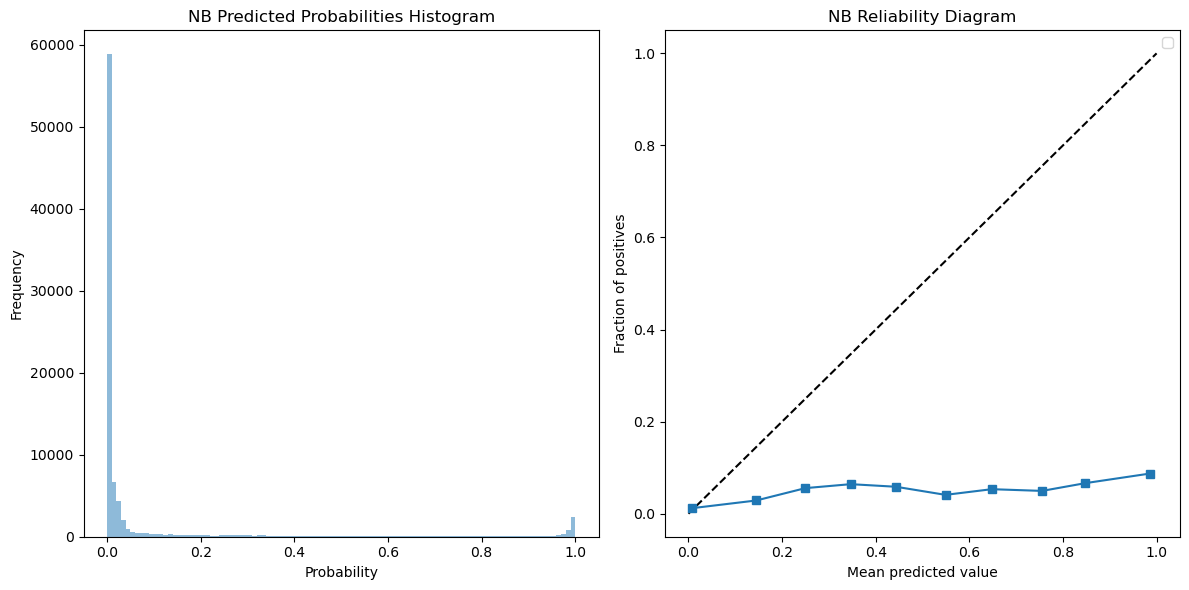

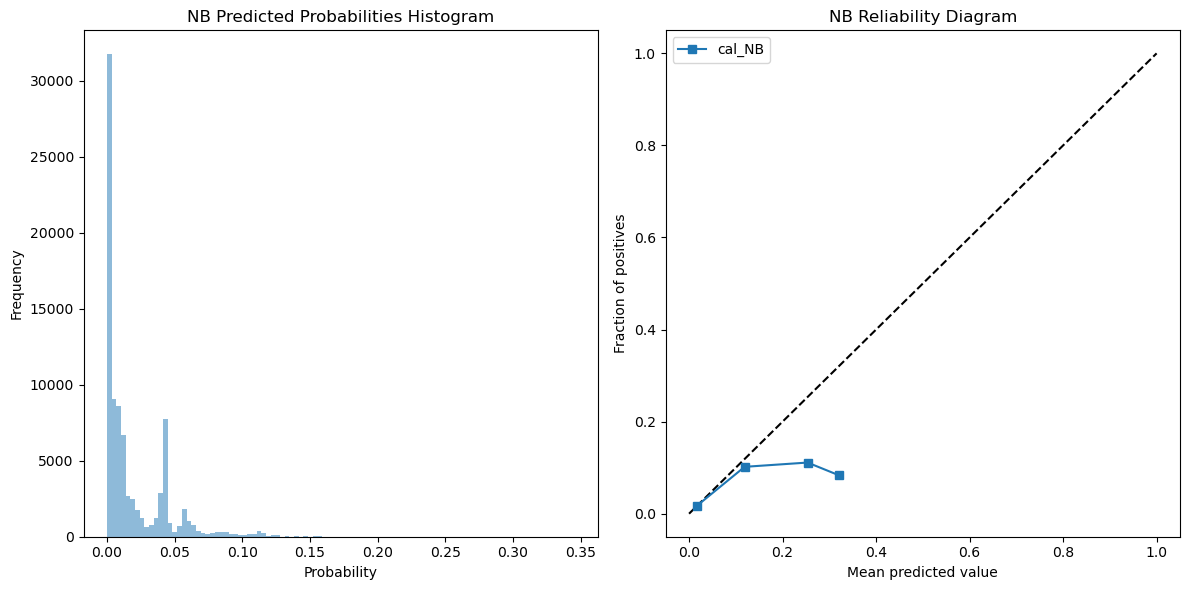

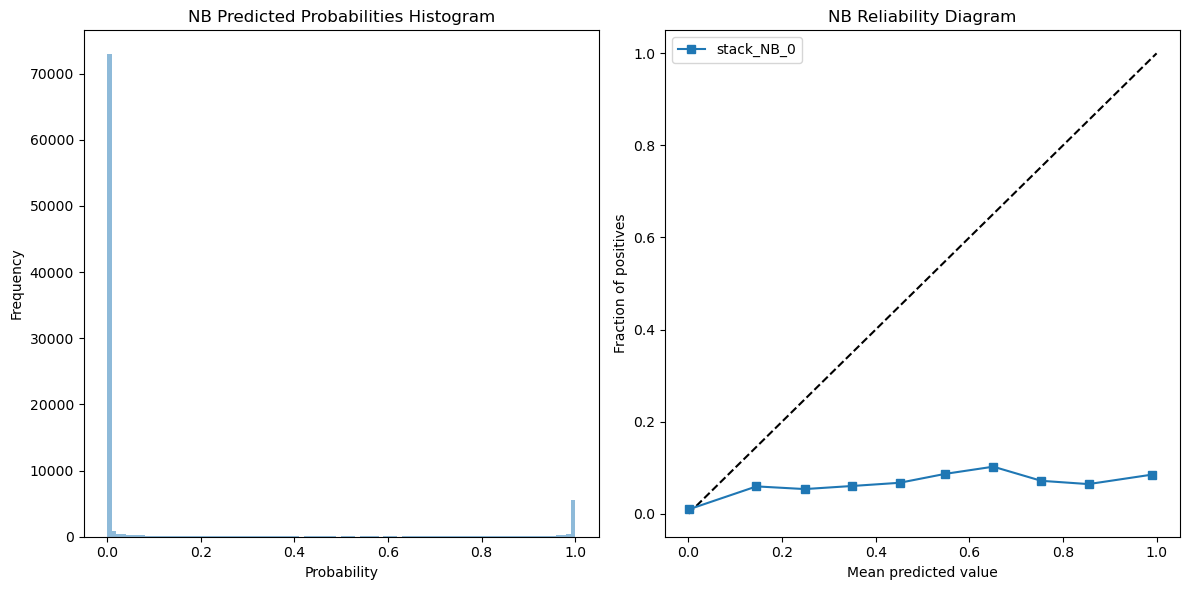

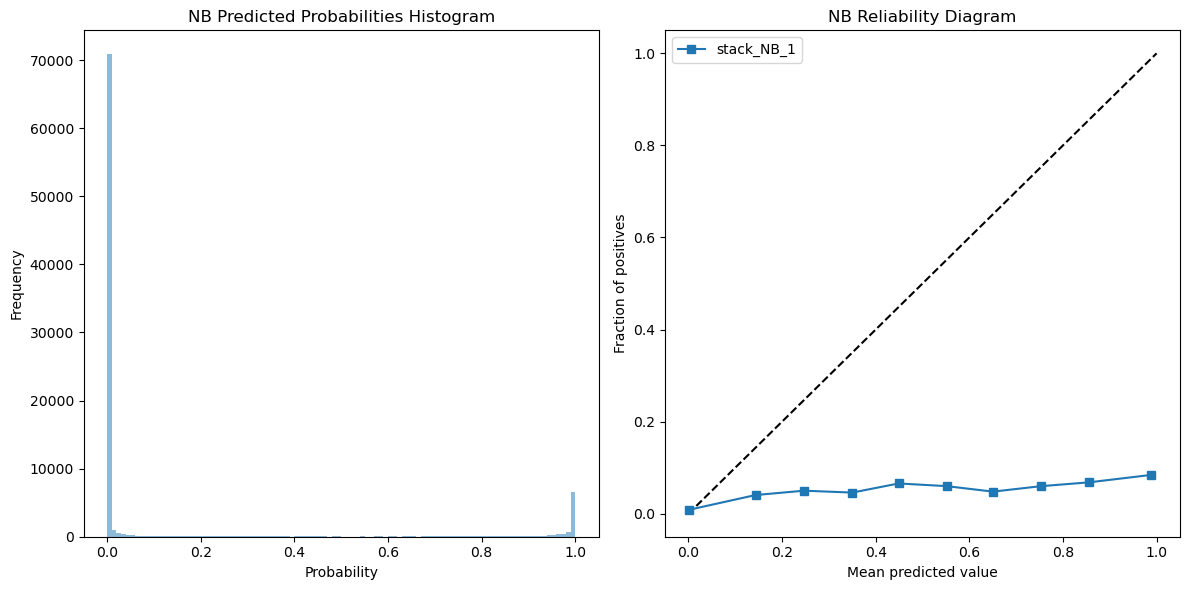

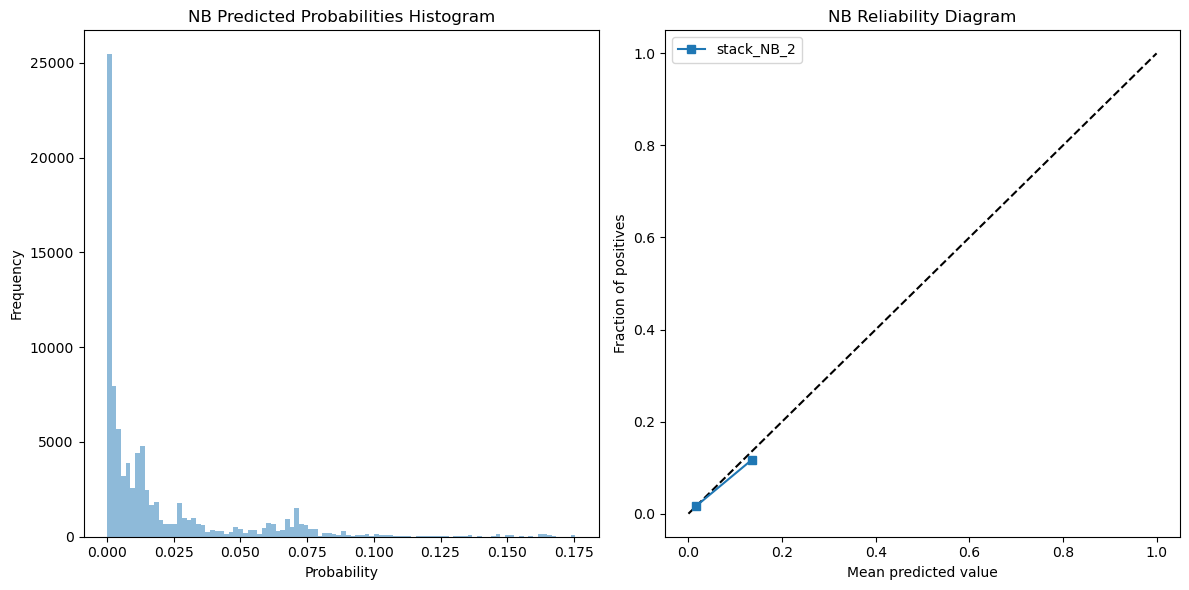

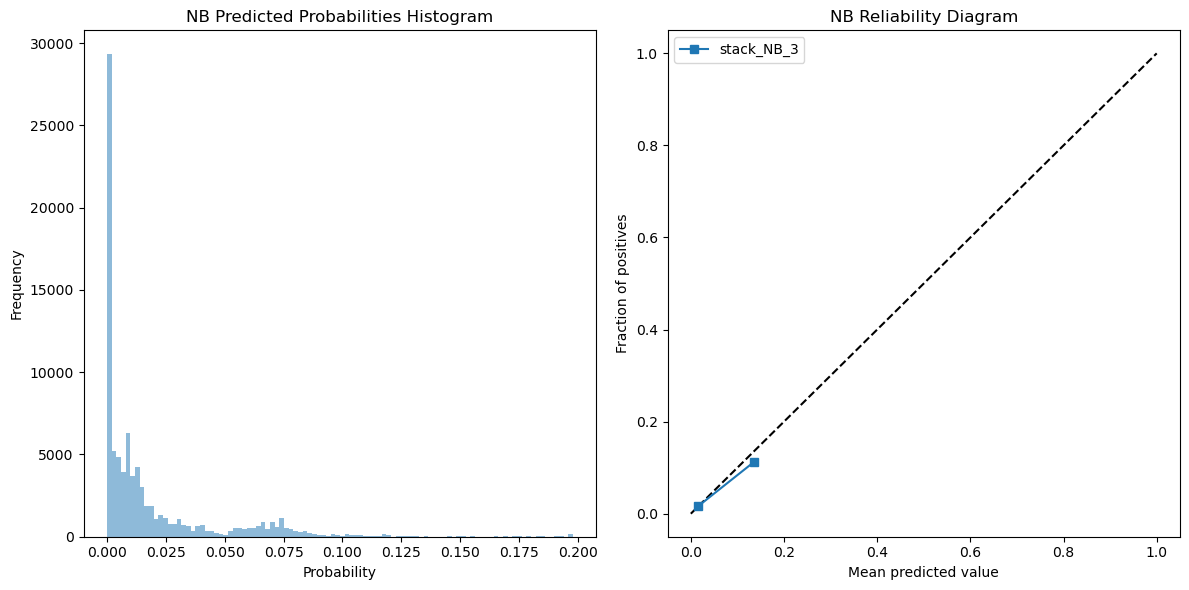

In [41]:
for key in probas_NB_dict.keys():
    all_probas = np.concatenate(probas_NB_dict[key], axis=0)[:, 1]  # 修改列的索引以匹配您的数据
    true_labels = np.array(true_NB_labels)
    
    # 生成直方图
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(all_probas, bins=100, alpha=0.5, label=key)
    plt.title('NB Predicted Probabilities Histogram')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    
    # 生成可靠性图
    plt.subplot(1, 2, 2)
    prob_true, prob_pred = calibration_curve(true_labels, all_probas, n_bins=10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(prob_pred, prob_true, 's-', label=key)
    plt.title('NB Reliability Diagram')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()